## <font color = blue>EDA Case Study</font>

This case study aims to give you an idea of applying EDA in a real business scenario and also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Problem statement

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

### Buisness objective

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

#### Importing the libraries.

In [1]:
# Import Librarires

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### Reading the Application dataset

In [2]:
# Reading the current application of the customer
df_application= pd.read_csv("application_data.csv")


#### Shape of Application data set

In [3]:
# Checking for no of rows and columns of current customer
df_application.shape

(307511, 122)

##### To view large data set

In [4]:
# To view large output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 123)
pd.set_option('display.width', 1000)

#### View the application data set in a glance

In [5]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Check data types of application dataset


In [6]:
# Checking for column wise info for the current customer data frame
df_application.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

#### Summary for numeric columns in application dataset

In [7]:
#Checking for statistical summary of current customer columns
df_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

#### Check for null value percentage in all the application data set columns

In [8]:
#percentage of missing value for current customer data frame
df_application.isna().sum()/len(df_application)*100



SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

#### Dropping columns having higher null percenatge values

In [9]:
# Droping apartment related columns as there are high percentage of missing values 

df_application.drop(df_application.iloc[:, 44:90],inplace=True, axis=1)


In [10]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [11]:
df_application.isna().sum()/len(df_application)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990810
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

#### Dropping Columns Manually

In [12]:
# drop 3 columns from application data frame as missing values are high
df_application.drop(['OWN_CAR_AGE','EXT_SOURCE_1', 'EMERGENCYSTATE_MODE'],inplace=True, axis = 1) 

In [13]:
# Columns remain after removing high percentage of null values.
df_application.isna().sum()/len(df_application)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

#### Dropping unwanted columns

In [14]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [15]:
# drop unwanted columns

df_application.drop(df_application.iloc[:, 47:67], inplace=True, axis=1)

In [16]:
# remove other flag columns
df_application.drop(df_application.iloc[:, 21:27], inplace=True, axis=1)

In [17]:
# Columns remain after removing high percentage of null values.
df_application.isna().sum()/len(df_application)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CL

### Columns with missing values of <=13%

AMT_REQ_CREDIT_BUREAU_HOUR     13.501631

AMT_REQ_CREDIT_BUREAU_DAY      13.501631

AMT_REQ_CREDIT_BUREAU_WEEK     13.501631

AMT_REQ_CREDIT_BUREAU_MON      13.501631

AMT_REQ_CREDIT_BUREAU_QRT      13.501631

AMT_REQ_CREDIT_BUREAU_YEAR     13.501631


#### Imputing values of Amt_Annuity  column

In [18]:
# Imputing missing values in AMT_ANNUITY column with median value.
values=df_application['AMT_ANNUITY'].median()

df_application.loc[df_application['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values


In [19]:

df_application.isna().sum()/len(df_application)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CL

#### Imputing values of Amt Goods Price column

In [20]:
# Imputing missing values in AMT_GOODS_PRICE column with median value.
values=df_application['AMT_GOODS_PRICE'].median()
df_application.loc[df_application['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=values

In [21]:
df_application.isna().sum()/len(df_application)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CL

#### Imputing values of Name type suite column

In [22]:
# To check most common category present in the column "NAME_TYPE_SUITE"

df_application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [23]:
# Impute the missing values with the most common category value in the column "NAME_TYPE_SUITE"

df_application.NAME_TYPE_SUITE = df_application["NAME_TYPE_SUITE"].astype("string")



In [24]:
# Imputing missing values in NAME_TYPE_SUITE column with mode value.
values=df_application['NAME_TYPE_SUITE'].mode()[0]

df_application.loc[df_application['NAME_TYPE_SUITE'].isnull(),'NAME_TYPE_SUITE']=values

In [25]:

df_application.isna().sum()/len(df_application)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CL

In [26]:
df_application['EXT_SOURCE_2'].value_counts()


0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.169134      1
0.213753      1
0.057994      1
0.229146      1
0.336367      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

In [27]:
# Imputing missing values in AMT_GOODS_PRICE column with median value.
values=df_application['EXT_SOURCE_2'].median()
df_application.loc[df_application['EXT_SOURCE_2'].isnull(),'EXT_SOURCE_2']=values

In [28]:
df_application.isna().sum()/len(df_application)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CL

In [29]:
# Imputing missing values in EXT_SOURCE_3 column with median value.
values=df_application['EXT_SOURCE_3'].median()
df_application.loc[df_application['EXT_SOURCE_3'].isnull(),'EXT_SOURCE_3']=values

In [30]:
df_application.isna().sum()/len(df_application)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CL

#### Imputing missing numeric column values


In [31]:
df_application.isna().sum()/len(df_application)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CL

#### Check for XNA values in the columns
columns where the value is mentioned as 'XNA' which means 'Not Available'. find the number of rows and columns and replace them to fill those missing values or to delete them.

In [32]:
# we are checking for XNA values in the categorical columns which is a unwanted values.
df_application[df_application['NAME_CONTRACT_TYPE']=='XNA'].shape

(0, 47)

In [33]:
#df_application.CODE_GENDER = df_application["CODE_GENDER"].astype("string")

df_application['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [34]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  string 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [35]:
# we are checking for XNA values in the categorical columns which is a unwanted values.
df_application[df_application['CODE_GENDER']=='XNA'].shape

(4, 47)

In [36]:
df_application['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [37]:
#replacing XNA in CODE_GENDER column with mode
df_application.loc[df_application['CODE_GENDER']=='XNA','CODE_GENDER']='F'

In [38]:
df_application.shape

(307511, 47)

In [39]:
df_application[df_application['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 47)

In [40]:
df_application=df_application.drop(df_application.loc[df_application['ORGANIZATION_TYPE']=='XNA'].index)
df_application[df_application['ORGANIZATION_TYPE']=='XNA'].shape

(0, 47)

In [41]:
# we are checking for XNA values in the categorical columns which is a unwanted values.
df_application[df_application['NAME_INCOME_TYPE']=='XNA'].shape

(0, 47)

In [42]:
# we are checking for XNA values in the categorical columns which is a unwanted values.
df_application[df_application['NAME_EDUCATION_TYPE']=='XNA'].shape

(0, 47)

In [43]:
# we are checking for XNA values in the categorical columns which is a unwanted values.
df_application[df_application['NAME_FAMILY_STATUS']=='XNA'].shape

(0, 47)

In [44]:
# we are checking for XNA values in the categorical columns which is a unwanted values.
df_application[df_application['ORGANIZATION_TYPE']=='XNA'].shape

(0, 47)

In [45]:
# we are checking for XNA values in the categorical columns which is a unwanted values.
df_application[df_application['NAME_HOUSING_TYPE']=='XNA'].shape

(0, 47)

In [46]:
df_application.isna().sum()/len(df_application)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                16.268537
CNT_FAM_MEMBERS                 0.000793
REGION_RATING_CLIENT            0.000000
REGION_RATING_CL

In [47]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252137 non-null  int64  
 1   TARGET                       252137 non-null  int64  
 2   NAME_CONTRACT_TYPE           252137 non-null  object 
 3   CODE_GENDER                  252137 non-null  object 
 4   FLAG_OWN_CAR                 252137 non-null  object 
 5   FLAG_OWN_REALTY              252137 non-null  object 
 6   CNT_CHILDREN                 252137 non-null  int64  
 7   AMT_INCOME_TOTAL             252137 non-null  float64
 8   AMT_CREDIT                   252137 non-null  float64
 9   AMT_ANNUITY                  252137 non-null  float64
 10  AMT_GOODS_PRICE              252137 non-null  float64
 11  NAME_TYPE_SUITE              252137 non-null  string 
 12  NAME_INCOME_TYPE             252137 non-null  object 
 13 

#### Derived Metrics

In [48]:
#adding a new column to derive income range

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
ranges = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df_application['INCOME_RANGE']=pd.cut(df_application['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [49]:
#adding a new column to derive credit range

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
ranges = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df_application['CREDIT_RANGE']=pd.cut(df_application['AMT_CREDIT'],bins=bins,labels=ranges)

In [50]:
#adding a new column to derive Age

bins = [0,20,30,40,50,60,999]
ranges = ["0-20", "20-30", "30-40","40-50","50-60","60+"]

df_application["AGE"] = pd.cut(((df_application.DAYS_BIRTH*-1)/365.25), bins=bins,labels=ranges)

### Creating Target 0 and Target 1 Dataframe

In [51]:
##Spliting the Target variable into two data frames

df_Target_0= df_application[df_application.TARGET==0]
df_Target_1= df_application[df_application.TARGET==1]

### Check for Data Imbalance

In [52]:
df_application.TARGET.value_counts(normalize = True)

0    0.9134
1    0.0866
Name: TARGET, dtype: float64

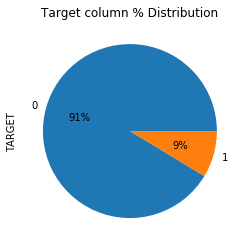

In [53]:
#Plotting Target column distribution
df_application.TARGET.value_counts().plot.pie(autopct = "%1.0f%%")
plt.title ("Target column % Distribution")
plt.show()

Points to be concluded from the graph.

1) Of the overall population in application dataset, close to 91% applicants had no payment difficulties and remaining others had.

In [54]:
df_Target_0.shape

(230302, 50)

In [55]:
df_Target_1.shape

(21835, 50)

### Overall Population VS Target 0 and Target 1: Univariate Analysis on categorical Variable

In [56]:
def plotting (overall_pop, Target_0, Target_1, column):
    overallpop = overall_pop
    Target0 = Target_0
    Target1 = Target_1
    col = column
    
    plt.figure(figsize=(20,8))

    plt.subplot(1, 3, 1)
    plt.title(col+" % For Overall Population")
    overallpop[col].value_counts(normalize =  True).plot.bar()


    plt.subplot(1, 3, 2)
    plt.title(col+" % For Target 0 Population")
    Target0[col].value_counts(normalize =  True).plot.bar()
      
    plt.subplot(1, 3, 3)
    plt.title(col+" % For Target 1 Population")
    Target1[col].value_counts(normalize =  True).plot.bar()

    plt.show()

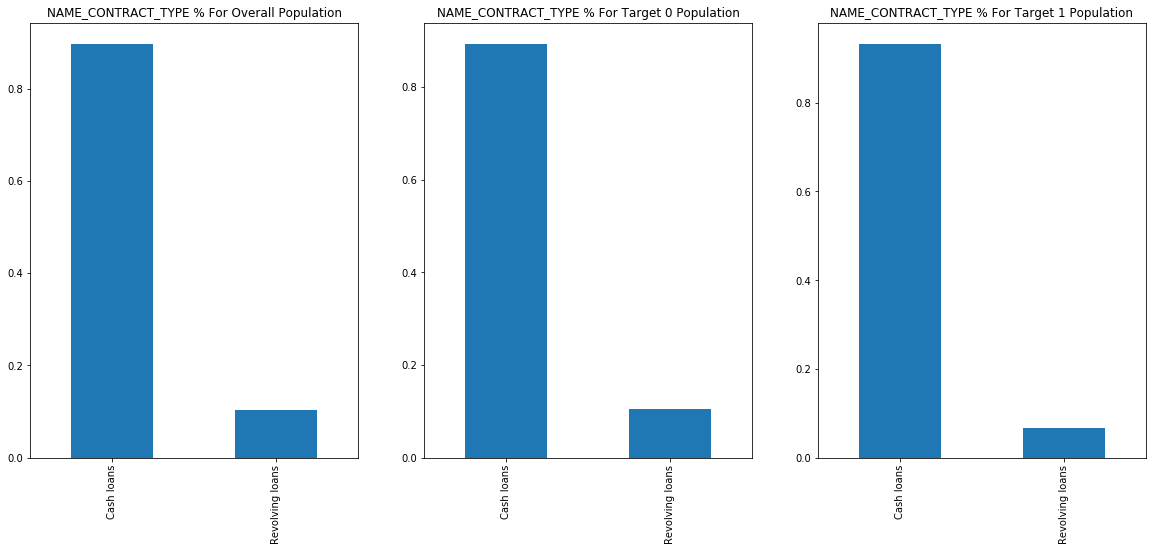

In [57]:
#Plotting NAME_CONTRACT_TYPE % for overall population vs. Target 0 vs. Target 1
plotting (df_application, df_Target_0, df_Target_1, "NAME_CONTRACT_TYPE")

Points to be concluded from the above graph.

1) Credit was given mainly for cash loan

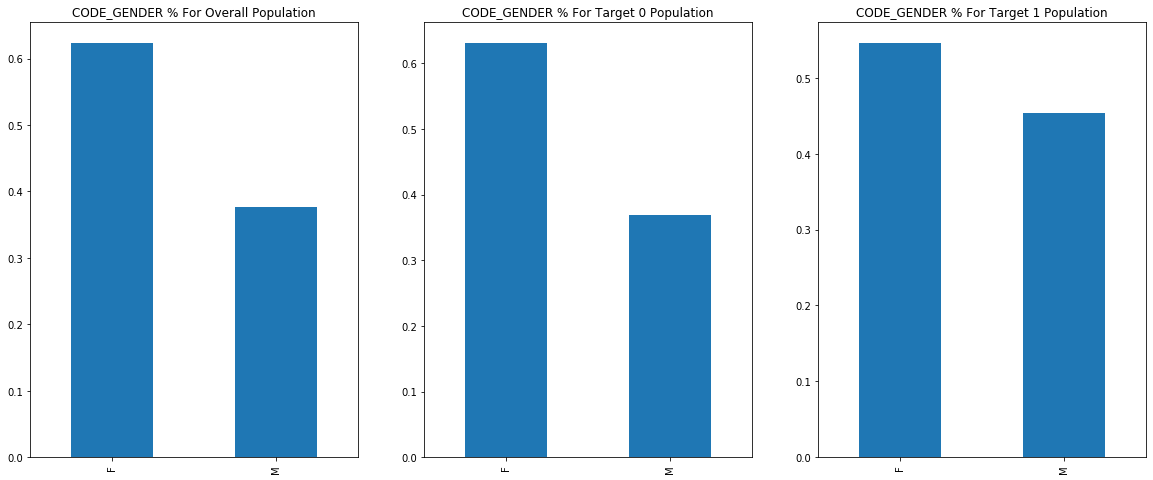

In [58]:
#Plotting CODE_GENDER % for overall population vs. Target 0 vs. Target 1
plotting (df_application, df_Target_0, df_Target_1, "CODE_GENDER")

Points to be concluded from the above graph.

1) Credit was given mainly to females

2) Male population have higher chance of defaulted than female

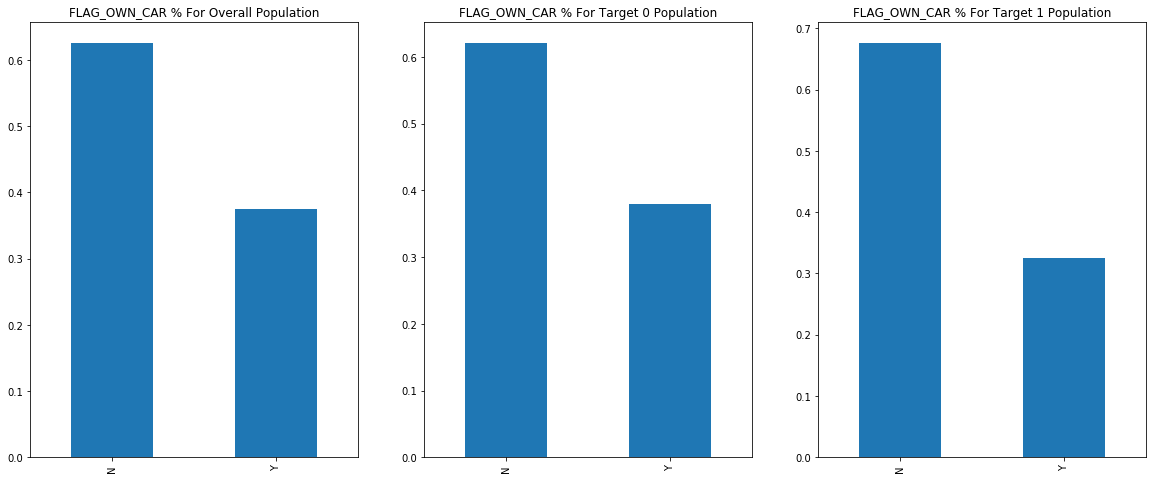

In [59]:
#Plotting FLAG_OWN_CAR % for overall population vs. Target 0 vs. Target 1
plotting (df_application, df_Target_0, df_Target_1, "FLAG_OWN_CAR")

Points to be concluded from the above graph.

1) Applicants without own car represents higher % of overall credit then with own car

2) Applicants without own car have higher chance of defaulted than with own car

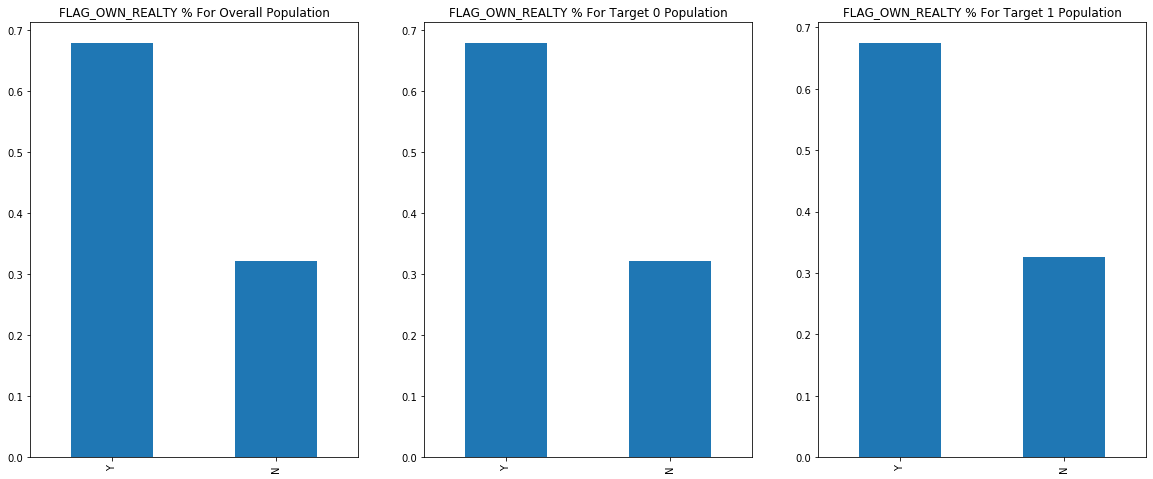

In [60]:
#Plotting FLAG_OWN_REALTY % for overall population vs. Target 0 vs. Target 1
plotting (df_application, df_Target_0, df_Target_1, "FLAG_OWN_REALTY")

Points to be concluded from the above graph.

1) Applicants with realty represents higher % then without realty

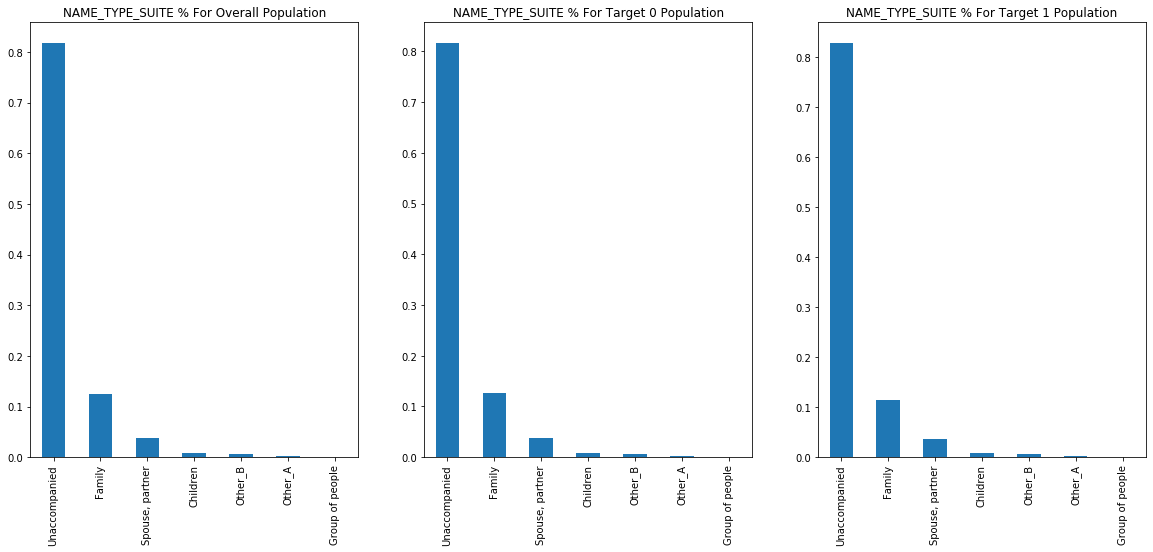

In [61]:
#Plotting NAME_TYPE_SUITE % for overall population vs. Target 0 vs. Target 1

df_application.NAME_TYPE_SUITE = df_application.NAME_TYPE_SUITE.astype(object)
df_Target_0.NAME_TYPE_SUITE = df_application.NAME_TYPE_SUITE.astype(object)
df_Target_1.NAME_TYPE_SUITE = df_application.NAME_TYPE_SUITE.astype(object)
plotting (df_application, df_Target_0, df_Target_1, "NAME_TYPE_SUITE")

Points to be concluded from the above graph.

1) "Unaccompanied" represents higher % credit

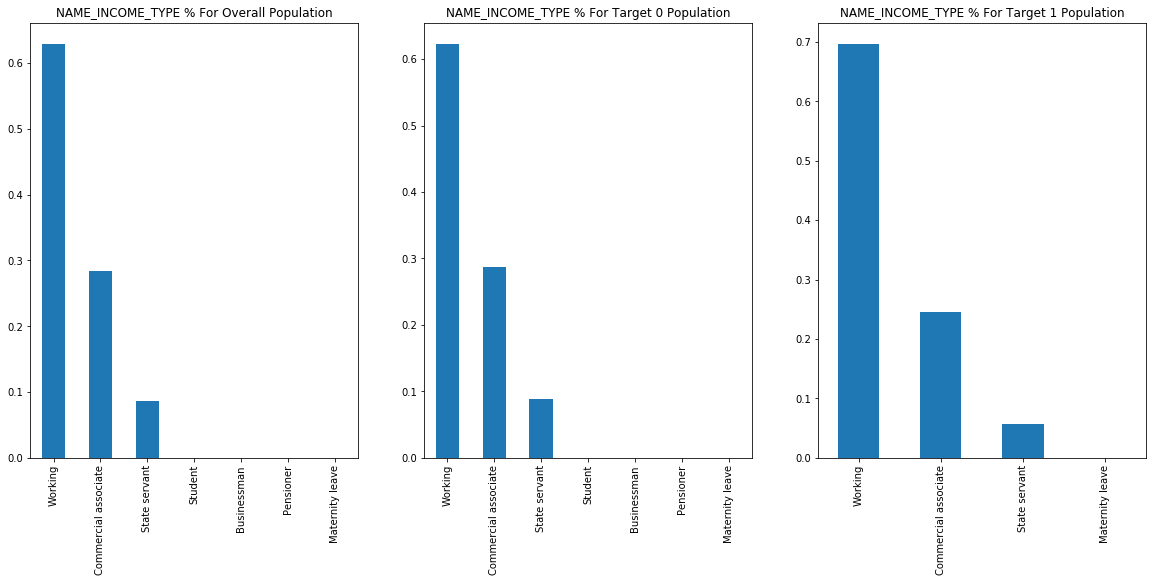

In [62]:
#Plotting NAME_INCOME_TYPE % for overall population vs. Target 0 vs. Target 1

plotting (df_application, df_Target_0, df_Target_1, "NAME_INCOME_TYPE")

Points to be concluded from the above graph.

1) Applicants with "Working", "Commercial Associate", "Pensioner" & State Servant" status represents higher % of overall credit then others

2) Applicants with "Student", "Businessman" & "Pensioner" status have less chance to being defaulted

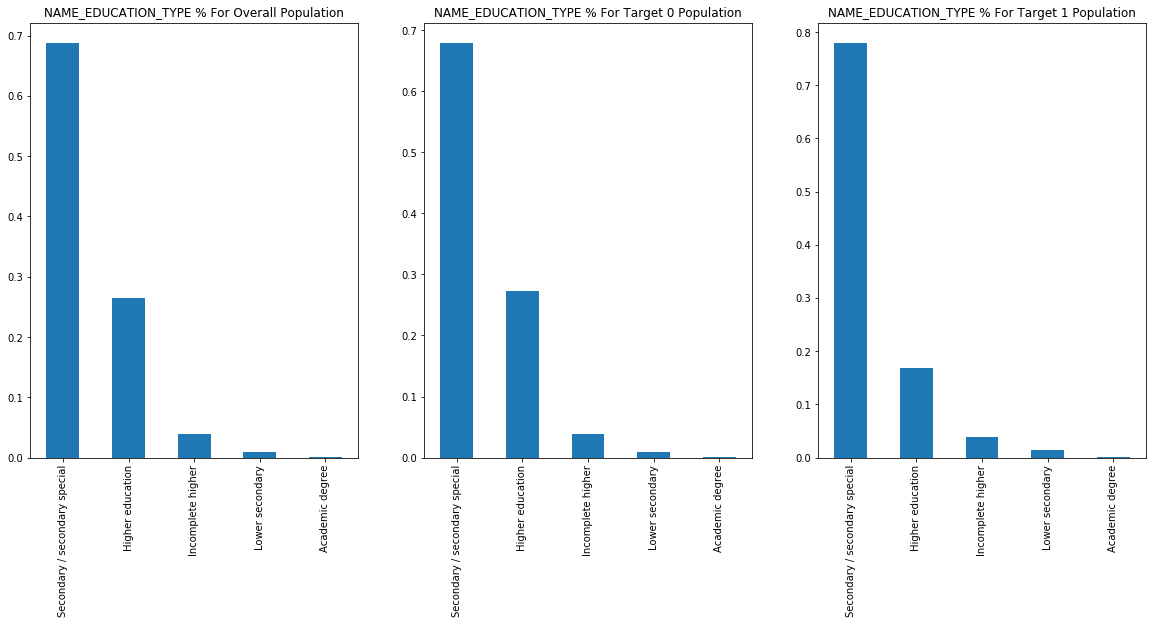

In [63]:
#Plotting NAME_EDUCATION_TYPE % for overall population vs. Target 0 vs. Target 1
plotting (df_application, df_Target_0, df_Target_1, "NAME_EDUCATION_TYPE")

Points to be concluded from the above graph

1) Applicants with "Secondary/Secondary Special" & "Higher Education" status represents higher % of overall credit then others

2) Applicants with "Secondary/Secondary Special" have higher chance to being defaulted compare to other

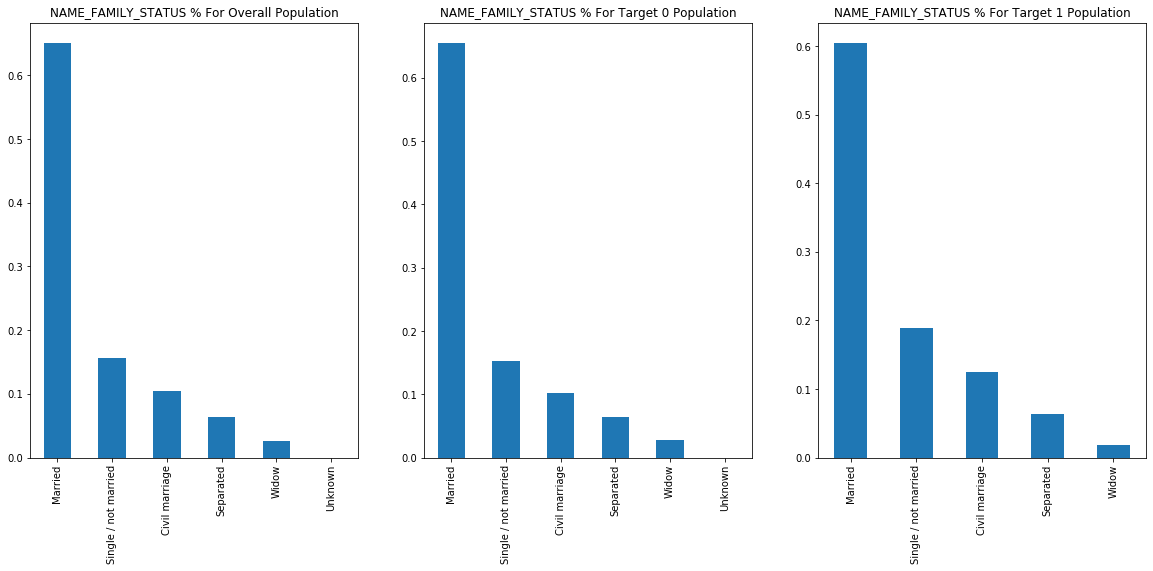

In [64]:
#Plotting NAME_FAMILY_STATUS % for overall population vs. Target 0 vs. Target 1
plotting (df_application, df_Target_0, df_Target_1, "NAME_FAMILY_STATUS")

Points to be concluded from the above graph

1) Applicants with "Married" status have lesser chance to being defaulted compare to other


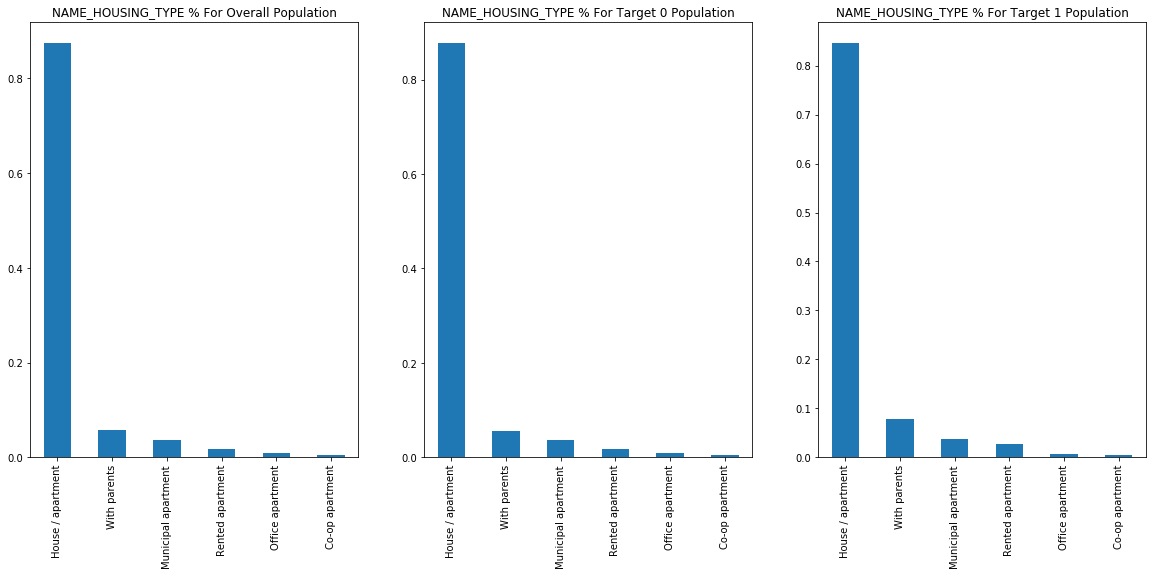

In [65]:
#Plotting NAME_HOUSING_TYPE % for overall population vs. Target 0 vs. Target 1
plotting (df_application, df_Target_0, df_Target_1, "NAME_HOUSING_TYPE")

Points to be concluded from the above graph

1) Applicants with "House/Apartment" status represents higher % of overall credit then others

2) Applicants "With Parent" status have higher chance to being defaulted compare to other


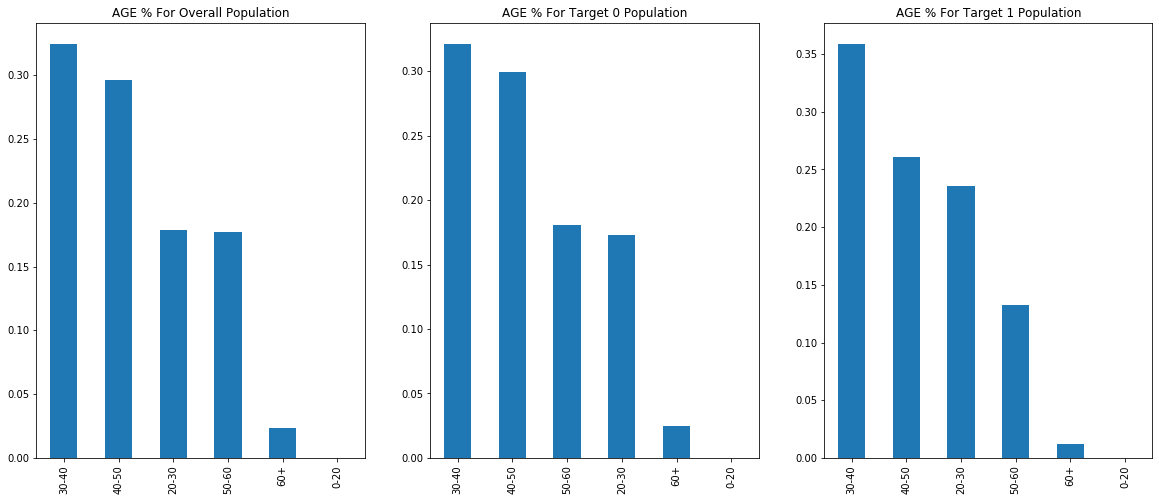

In [66]:
#Plotting AGE % for overall population vs. Target 0 vs. Target 1
plotting (df_application, df_Target_0, df_Target_1, "AGE")

Points to be concluded from the above graph

1) The max credit is given to applicants above age 30

2) The agre group 20-30 have higher chance of default than others

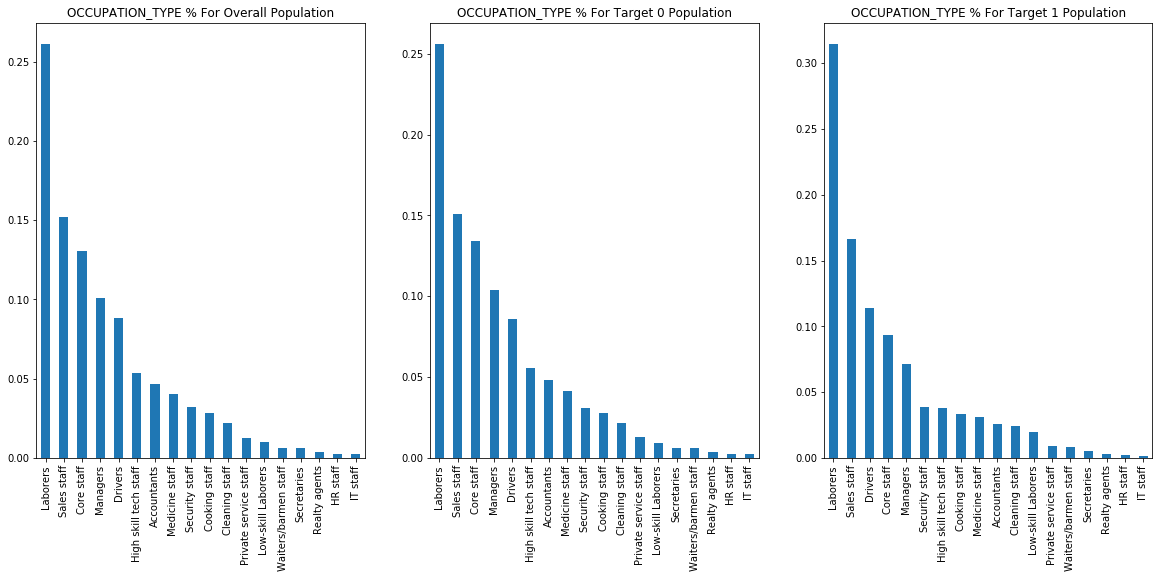

In [67]:
#Plotting OCCUPATION_TYPE % for overall population vs. Target 0 vs. Target 1
plotting (df_application, df_Target_0, df_Target_1, "OCCUPATION_TYPE")

Points to be concluded from the above graph

1) "Labourer", "Sales Staff", "Core Staff", "Managers" & "Drivers" represents higher % of overall credit then others

2) "Labourer" & "Sales Staff" have higher chance to being defaulted compare to other

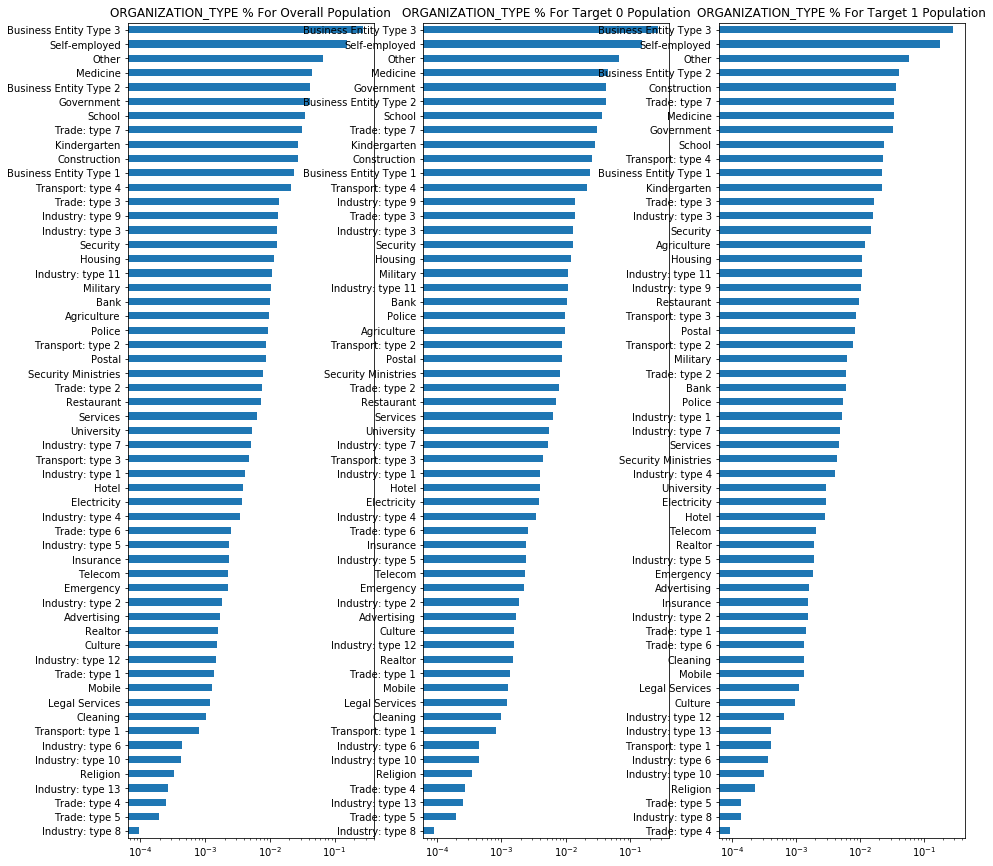

In [68]:
#Overall populations vs. Target 0 vs. Target 1 by Organization Type
plt.figure(figsize=(15,15))

plt.subplot(1, 3, 1)
plt.title("ORGANIZATION_TYPE % For Overall Population")
plt.xscale('log')
df_application.ORGANIZATION_TYPE.value_counts(normalize =  True, ascending = True).plot.barh()

plt.subplot(1, 3, 2)
plt.title("ORGANIZATION_TYPE % For Target 0 Population")
plt.xscale('log')
df_Target_0['ORGANIZATION_TYPE'].value_counts(normalize =  True, ascending = True).plot.barh()

plt.subplot(1, 3, 3)
plt.title("ORGANIZATION_TYPE % For Target 1 Population")
plt.xscale('log')
df_Target_1['ORGANIZATION_TYPE'].value_counts(normalize =  True, ascending = True).plot.barh()

plt.show()

Points to be concluded from the above graph

1) Applicants with "Business Entity Type 3" status represents higher % of overall credit then others

2) Applicants "Business Entity Type 3" & "Self-employed" status have higher chance of being defaulted compare to other

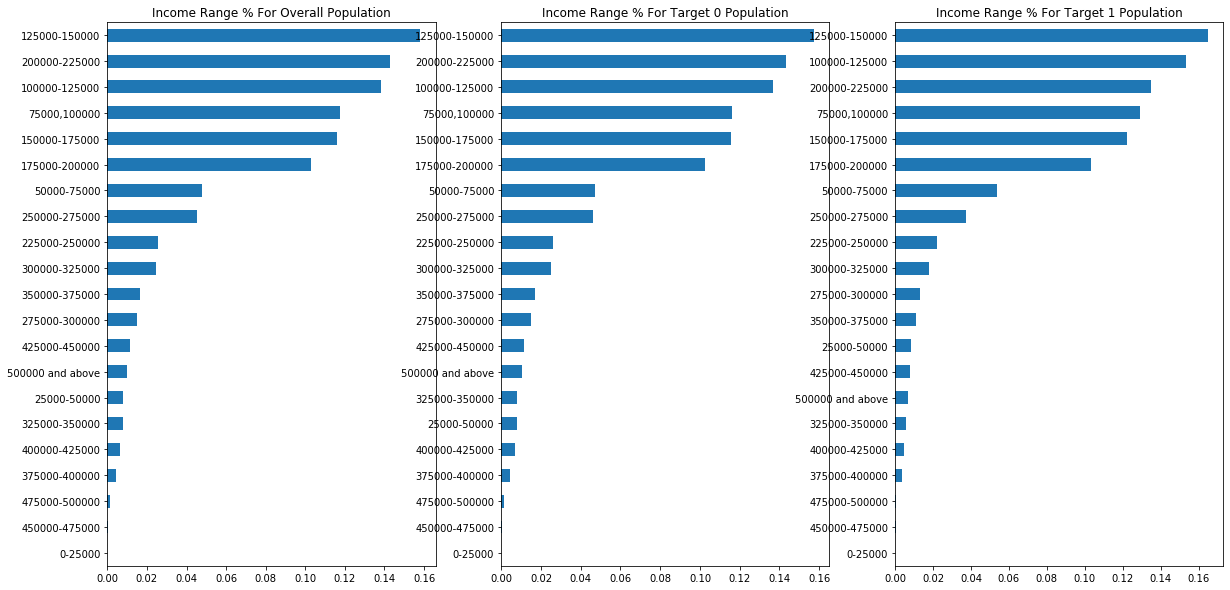

In [69]:
#Overall populations vs. Target 0 vs. Target 1 by Income Range
plt.figure(figsize=(20,10))

plt.subplot(1, 3, 1)
plt.title("Income Range % For Overall Population")
df_application.INCOME_RANGE.value_counts(normalize =  True, ascending = True).plot.barh()

plt.subplot(1, 3, 2)
plt.title("Income Range % For Target 0 Population")
df_Target_0['INCOME_RANGE'].value_counts(normalize =  True, ascending = True).plot.barh()

plt.subplot(1, 3, 3)
plt.title("Income Range % For Target 1 Population")
df_Target_1['INCOME_RANGE'].value_counts(normalize =  True, ascending = True).plot.barh()

plt.show()

Points to be concluded from the above graph

1) Applicants with income range "100000-200000" has maximum credit

2) Applicants with income range 400000 and above has less credit

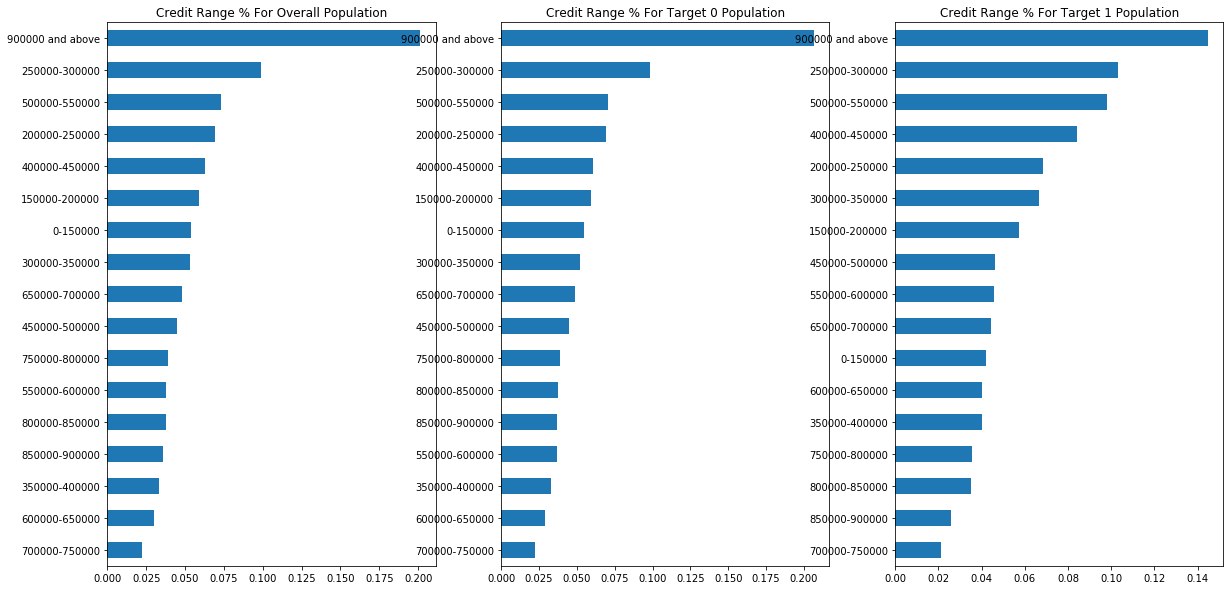

In [70]:
#Overall populations vs. Target 0 vs. Target 1 by credit Range
plt.figure(figsize=(20,10))

plt.subplot(1, 3, 1)
plt.title("Credit Range % For Overall Population")
df_application.CREDIT_RANGE.value_counts(normalize =  True, ascending = True).plot.barh()

plt.subplot(1, 3, 2)
plt.title("Credit Range % For Target 0 Population")
df_Target_0['CREDIT_RANGE'].value_counts(normalize =  True, ascending = True).plot.barh()

plt.subplot(1, 3, 3)
plt.title("Credit Range % For Target 1 Population")
df_Target_1['CREDIT_RANGE'].value_counts(normalize =  True, ascending = True).plot.barh()

plt.show()

Points to be concluded from the above graph

1) The max credit is for the range of 900000 and above

2) The credit range "500000-550000" have higher chance of default than others

### Checking for Outliers

####  Target 0 vs Target 1 by AMT_INCOME_TOTAL

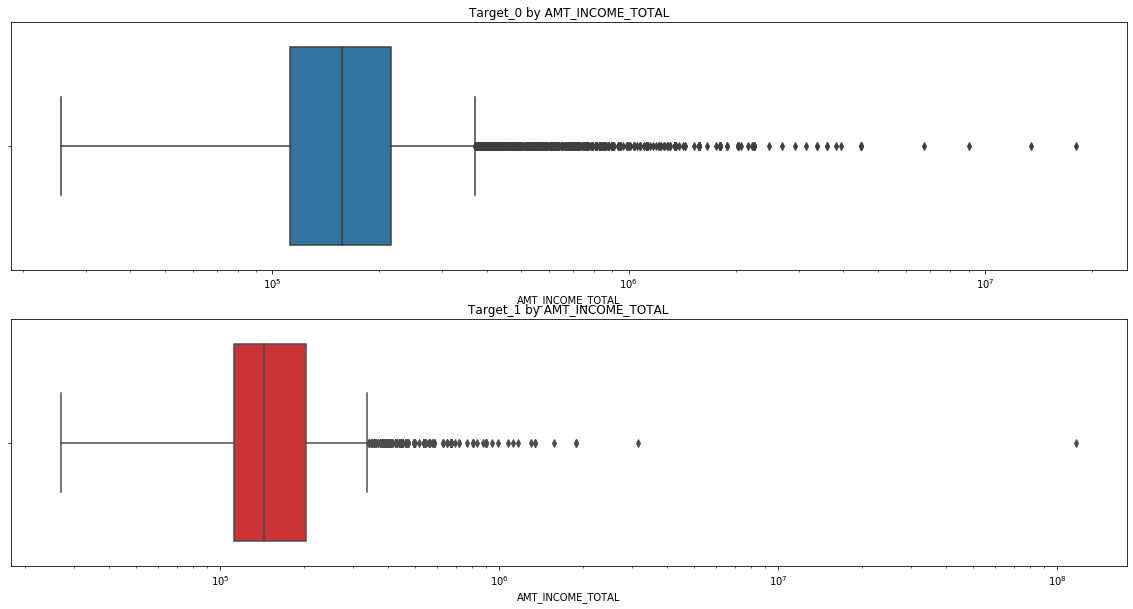

In [71]:
# Target_0 vs.Target_1 by AMT_INCOME_TOTAL
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
plt.title("Target_0 by AMT_INCOME_TOTAL")
plt.xscale('log')
sns.boxplot(df_Target_0['AMT_INCOME_TOTAL'])


plt.subplot(2, 1, 2)
plt.title("Target_1 by AMT_INCOME_TOTAL")
plt.xscale('log')
sns.boxplot(df_Target_1['AMT_INCOME_TOTAL'],palette="Set1")
plt.show()

In [72]:
df_Target_0['AMT_INCOME_TOTAL'].describe()

count    2.303020e+05
mean     1.764984e+05
std      1.154998e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.160000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

In [73]:
df_Target_1['AMT_INCOME_TOTAL'].describe()

count    2.183500e+04
mean     1.697506e+05
std      7.956149e+05
min      2.700000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Few quick points from above plots.

1. Some outliers are noticed for Target 1

2. Target 1 has the maximum income amount value compared to Target 0.

3. For Target 1: most of the clients income are in between median and third quartile region.


#### Target 0 vs Target 1 for Amt_Credit

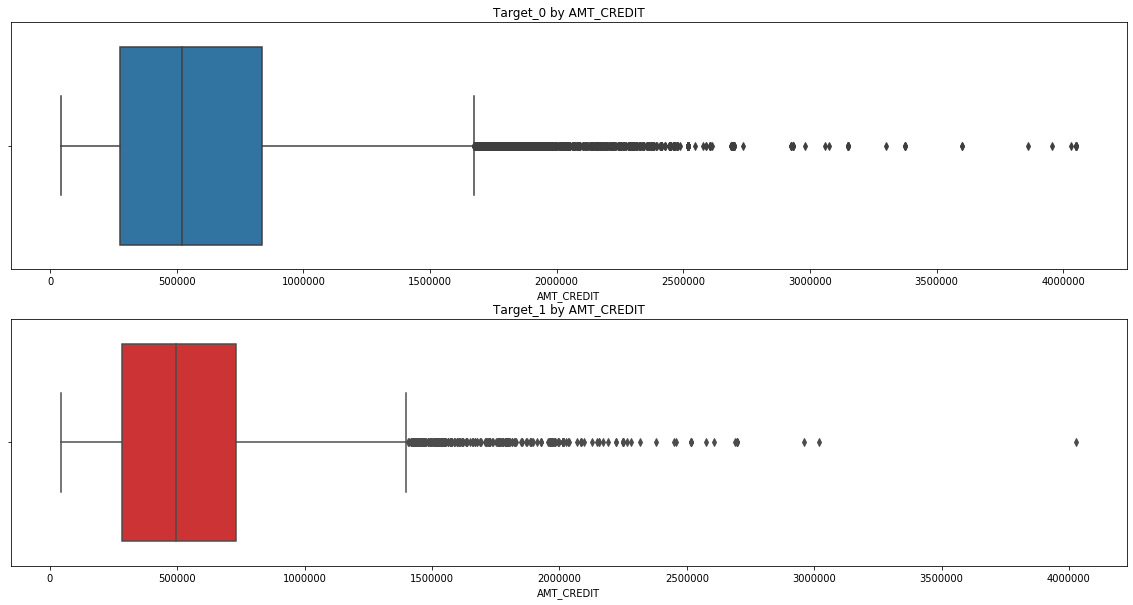

In [74]:
# Target_0 vs. Target_1 by AMT_CREDIT
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
plt.title("Target_0 by AMT_CREDIT")
sns.boxplot(df_Target_0['AMT_CREDIT'])


plt.subplot(2, 1, 2)
plt.title("Target_1 by AMT_CREDIT")
sns.boxplot(df_Target_1['AMT_CREDIT'],palette="Set1")
plt.show()

In [75]:
df_Target_0['AMT_CREDIT'].describe()

count    2.303020e+05
mean     6.164879e+05
std      4.114378e+05
min      4.500000e+04
25%      2.762775e+05
50%      5.212800e+05
75%      8.353800e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [76]:
df_Target_1['AMT_CREDIT'].describe()

count    2.183500e+04
mean     5.577178e+05
std      3.460483e+05
min      4.500000e+04
25%      2.844000e+05
50%      4.959855e+05
75%      7.290000e+05
max      4.027680e+06
Name: AMT_CREDIT, dtype: float64

Few quick points from above plots.
1. Some outliers are noticed for Target 1.

2. For Target 0 and Target 1: most of the credit amounts of clients are present in between maximum to median compared to values between minimum and median.

3. For Target 0 and Target 1: most of the clients have been given higher credit amount.


#### Target 0 vs Target 1 for Amt_Annuity

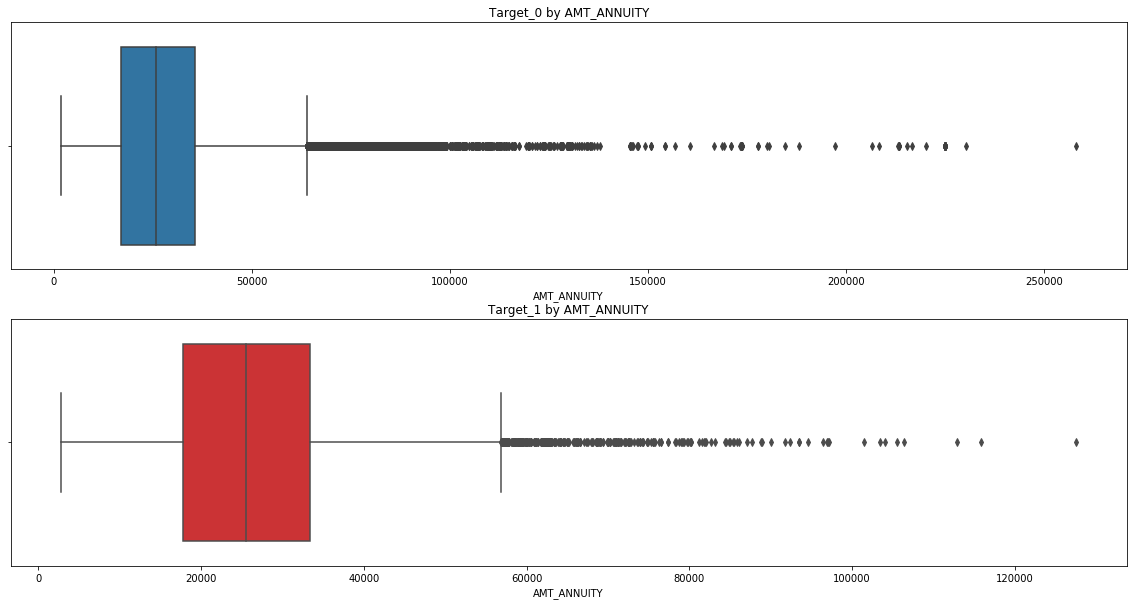

In [77]:
# Target_0 vs. Target_1 by AMT_ANNUITY
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
plt.title("Target_0 by AMT_ANNUITY")
sns.boxplot(df_Target_0['AMT_ANNUITY'])


plt.subplot(2, 1, 2)
plt.title("Target_1 by AMT_ANNUITY")
sns.boxplot(df_Target_1['AMT_ANNUITY'],palette="Set1")
plt.show()

In [78]:
df_Target_0['AMT_ANNUITY'].describe()

count    230302.000000
mean      27902.554759
std       14833.644504
min        1980.000000
25%       16969.500000
50%       25843.500000
75%       35743.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [79]:
df_Target_1['AMT_ANNUITY'].describe()

count     21835.000000
mean      26859.040669
std       12476.177108
min        2844.000000
25%       17732.250000
50%       25578.000000
75%       33394.500000
max      127507.500000
Name: AMT_ANNUITY, dtype: float64

Few quick points from above plots.

1. Some outliers are noticed for Target 1 and Target 0

2. Target 0 has a higher AMT_ANNUITY' value compared to Target 1.

3. For Target 1 and Target 0: most of the clients amount annuity lies between maximum to median compared to values between minimum to median.


#### Target 0 vs Target 1 Amount goods price

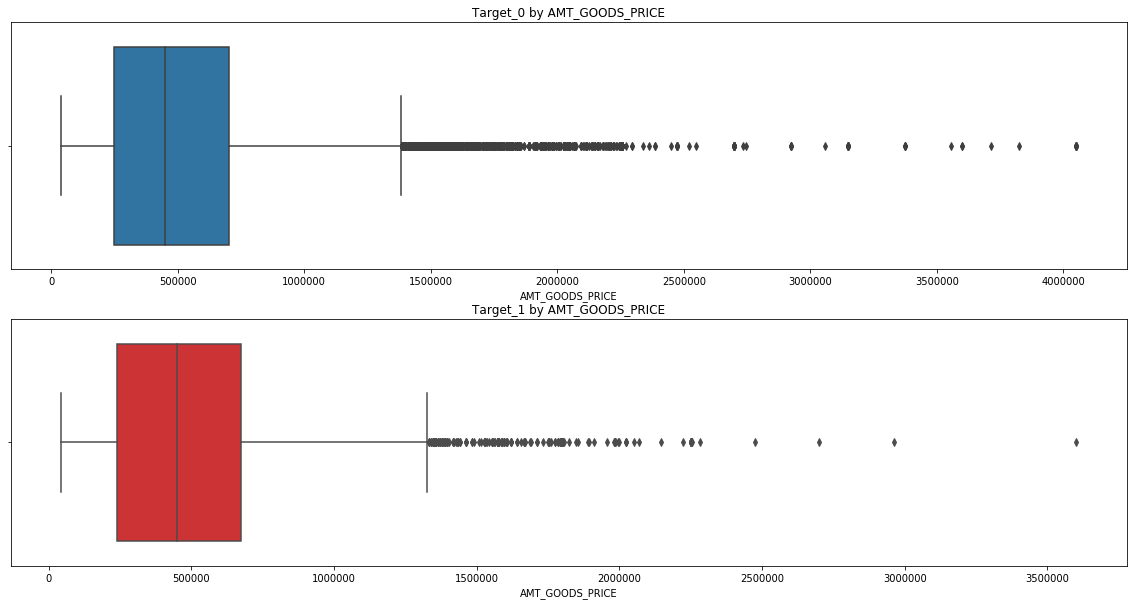

In [80]:
# Target_0 vs. Target_1 by AMT_GOODS_PRICE
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
plt.title("Target_0 by AMT_GOODS_PRICE")
sns.boxplot(df_Target_0['AMT_GOODS_PRICE'])


plt.subplot(2, 1, 2)
plt.title("Target_1 by AMT_GOODS_PRICE")
sns.boxplot(df_Target_1['AMT_GOODS_PRICE'],palette="Set1")
plt.show()

In [81]:
df_Target_0['AMT_GOODS_PRICE'].describe()

count    2.303020e+05
mean     5.550839e+05
std      3.779705e+05
min      4.050000e+04
25%      2.475000e+05
50%      4.500000e+05
75%      7.020000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [82]:
df_Target_1['AMT_GOODS_PRICE'].describe()

count    2.183500e+04
mean     4.883500e+05
std      3.106310e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.750000e+05
max      3.600000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [83]:
df_Target_1['AMT_GOODS_PRICE'].value_counts()

450000.0     3373
225000.0     1996
675000.0     1871
900000.0      975
180000.0      796
270000.0      755
135000.0      483
1125000.0     453
315000.0      439
454500.0      425
360000.0      420
238500.0      317
405000.0      251
247500.0      240
540000.0      205
495000.0      204
463500.0      195
202500.0      192
337500.0      188
472500.0      177
1350000.0     175
229500.0      174
90000.0       168
679500.0      160
585000.0      156
157500.0      152
630000.0      151
292500.0      126
283500.0      124
252000.0      124
382500.0      114
112500.0      112
477000.0      103
148500.0       95
810000.0       94
328500.0       89
720000.0       88
688500.0       88
765000.0       80
855000.0       78
256500.0       76
427500.0       74
387000.0       73
234000.0       73
1800000.0      73
373500.0       73
67500.0        71
1575000.0      69
697500.0       66
193500.0       63
243000.0       61
481500.0       59
261000.0       59
369000.0       57
945000.0       56
562500.0  

In [84]:
df_Target_0['AMT_GOODS_PRICE'].value_counts()

450000.0     20396
675000.0     17959
225000.0     16634
900000.0     12960
270000.0      9264
             ...  
443421.0         1
887314.5         1
887539.5         1
312790.5         1
1836000.0        1
Name: AMT_GOODS_PRICE, Length: 846, dtype: int64

Few quick points from above plots.
1. Some outliers are noticed for Target 1 and Target 0.

2. For Target 1 and Target 0: most of the clients amount good's price lies between maximum to median compared to values between minimum to median.

3. Target 0 has received the maximum amount value for the goods compared to Target 1.

## Correlation for numerical columns for Target 0

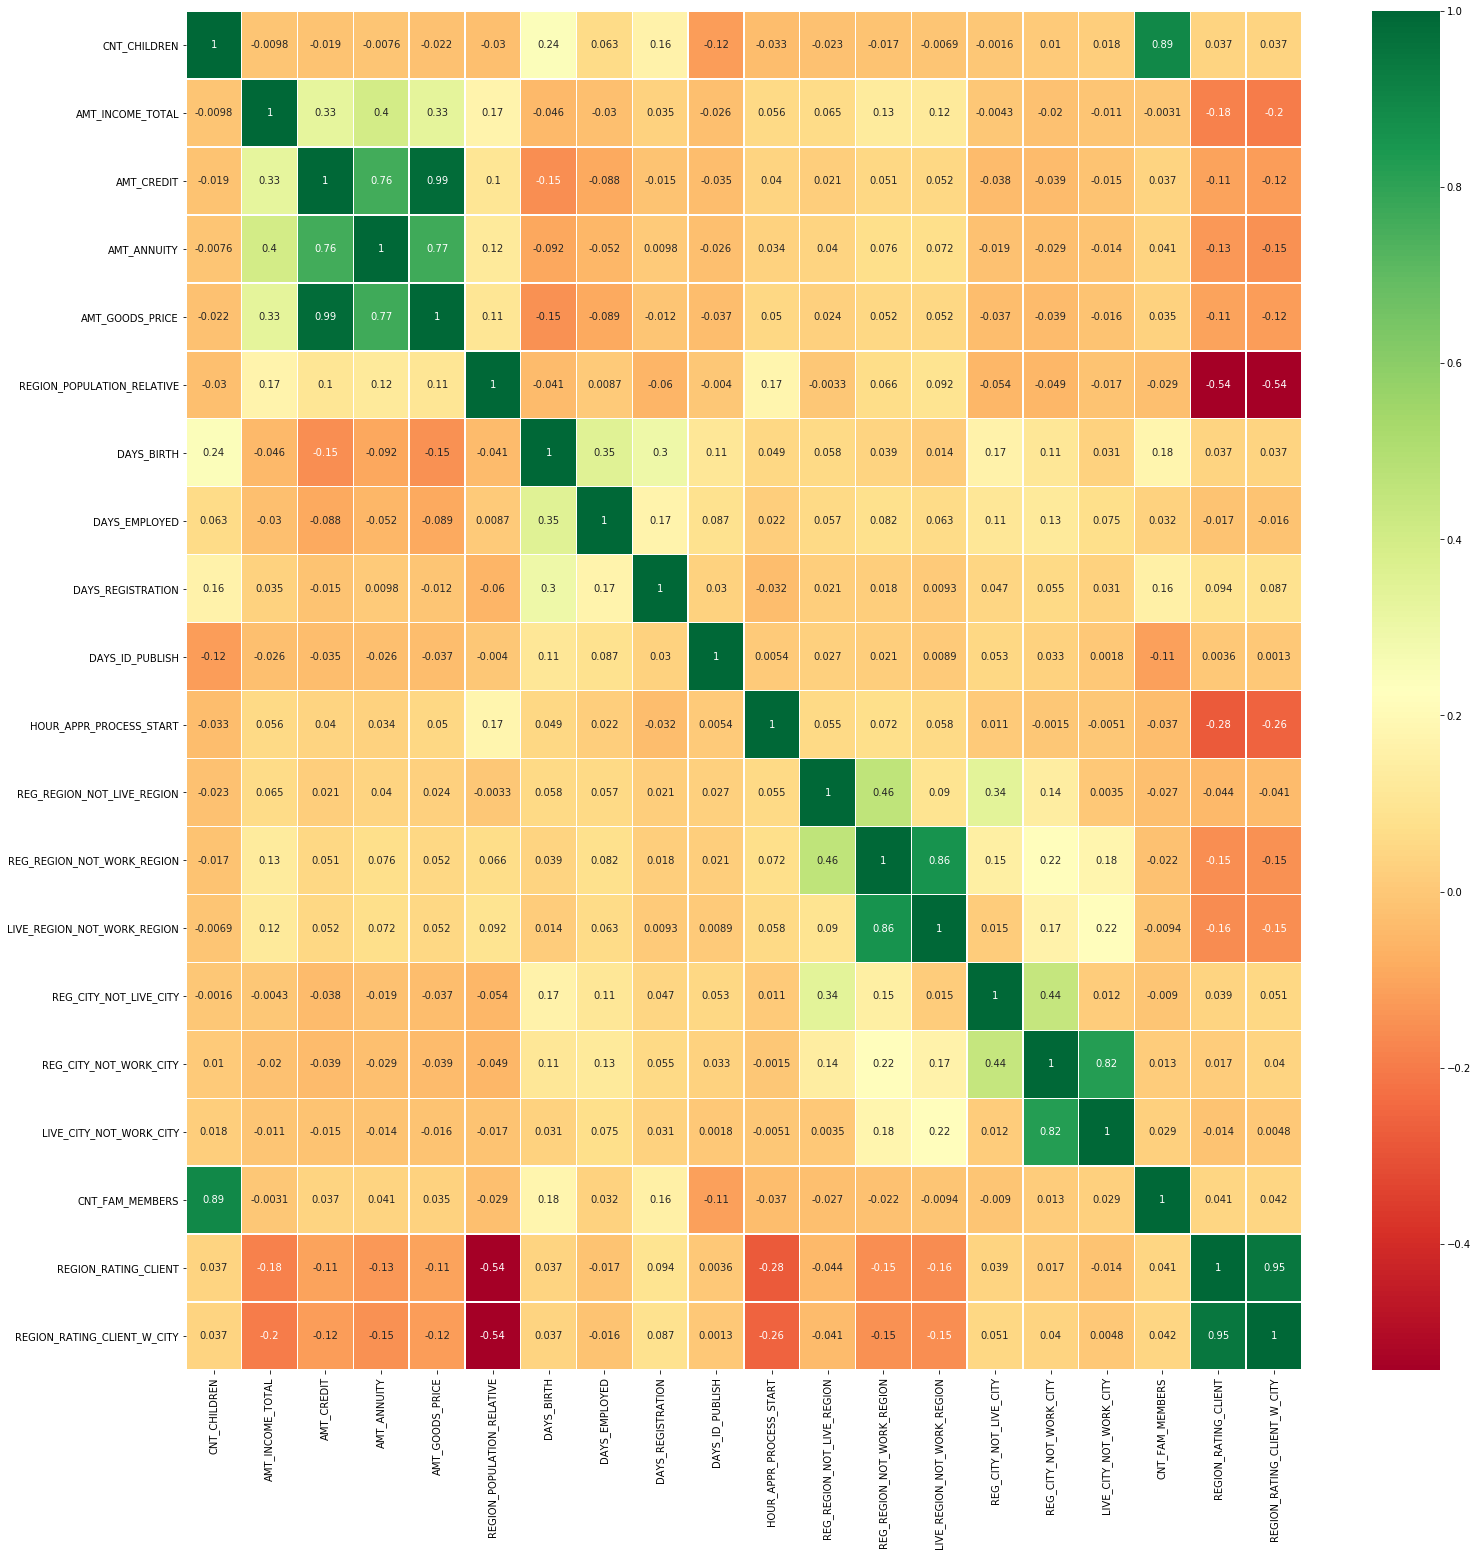

In [85]:
#Correleation heat map for Target_0

df_Target_0[["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","CNT_FAM_MEMBERS", "REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY"]].corr()
#plot the correlation matrix of all numeric columns of Target_0 variable
plt.figure(figsize=(25,25))
sns.heatmap(df_Target_0[["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","CNT_FAM_MEMBERS", "REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY"]].corr(), annot= True, cmap='RdYlGn',linewidths=.5)
plt.show()


 Important Findings from above Multivariate analysis
    
1.Amount annuity has a higher correlation with respect to Amount credit meaning clients higher credit amount tend to take higher EMI.


2.client's permanent address does not match contact address(REG_REGION_NOT_WORK_REGION) has a higher correlation with  client's contact address does not match work address(LIVE_REGION_NOT_WORK_REGION).


3.client's permanent address does not match work address(REG_CITY_NOT_WORK_CITY) has a higher correlation with client's contact address does not match work address(LIVE_CITY_NOT_WORK_CITY).


4.Amount annuity has a higher correlation with respect to Amount Goods price meaning clients with higher good's amount tend to take higher EMI.


5.Amount credit has a higher correlation with respect to Amount Goods price meaning clients with higher credit amount tend to take higher consumer good's amount.


6.Region rating client is inversly proportional to  the client lives in more populated region.

7.Region rating client has a higher correlation to region where client lives with taking city into account.

8.family members clients have a higher correlation to Number of children the client has.


## Correlation for numerical columns for Target 1

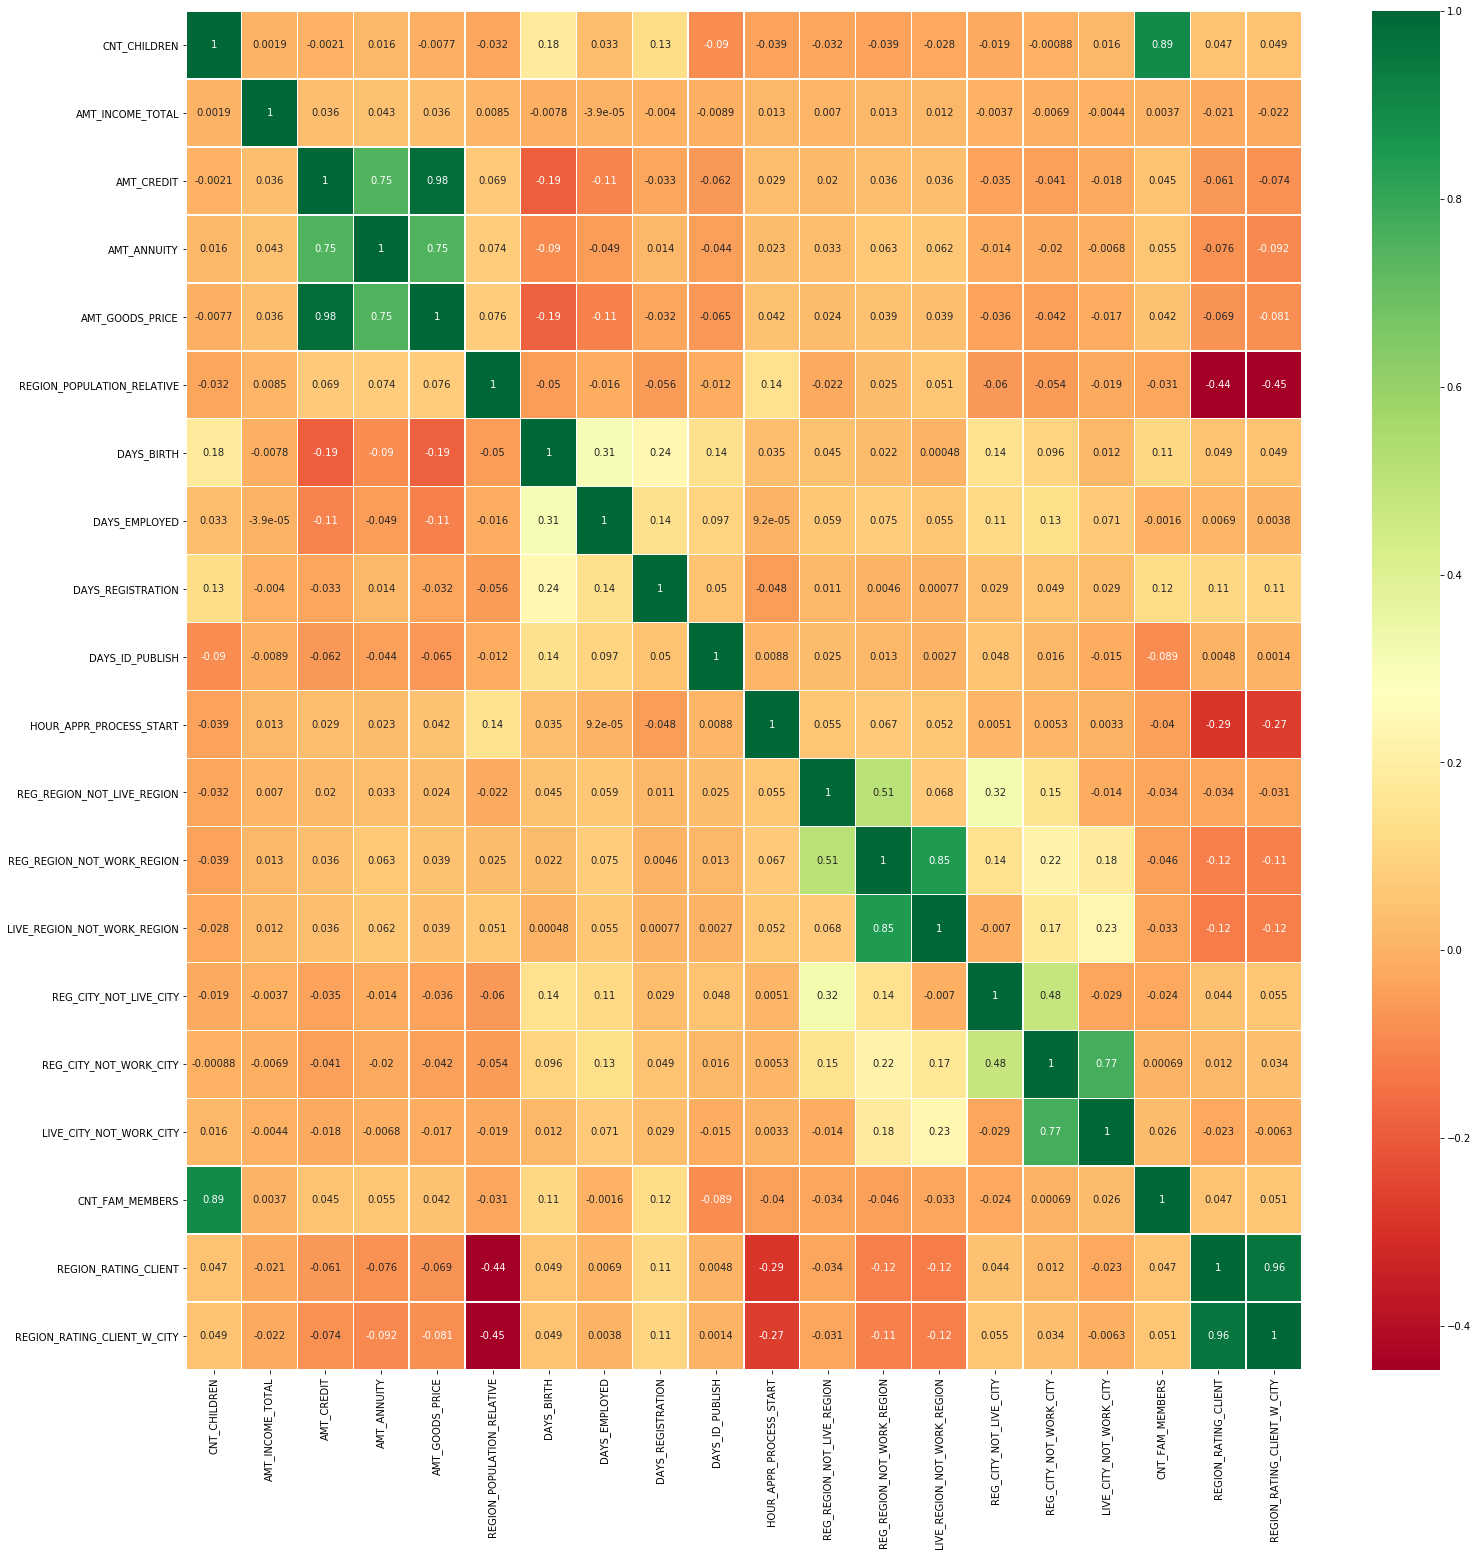

In [86]:
#Correleation heat map for Target_1

df_Target_1[["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY", "AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","CNT_FAM_MEMBERS", "REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY"]].corr()

#plot the correlation matrix of all numeric columns of Target_1 variable
plt.figure(figsize=(25,25))
sns.heatmap(df_Target_1[["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","CNT_FAM_MEMBERS", "REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY"]].corr(), annot= True, cmap='RdYlGn',linewidths=.5)
plt.show()

 Important Findings from above Multivariate analysis
    
1.Amount annuity has a higher correlation with respect to Amount credit meaning clients higher credit amount tend to take higher EMI.


2.client's permanent address does not match contact address(REG_REGION_NOT_WORK_REGION) has a higher correlation with  client's contact address does not match work address(LIVE_REGION_NOT_WORK_REGION).


3.client's permanent address does not match work address(REG_CITY_NOT_WORK_CITY) has a higher correlation with client's contact address does not match work address(LIVE_CITY_NOT_WORK_CITY).


4.Amount annuity has a higher correlation with respect to Amount Goods price meaning clients with higher good's amount tend to take higher EMI.


5.Amount credit has a higher correlation with respect to Amount Goods price meaning clients with higher credit amount tend to take higher consumer good's price.

6.Region rating client is inversly proportional to  the client lives in more populated region.

7.Region rating client has a higher correlation to region where client lives with taking city into account.

8.family members clients have a higher correlation to Number of children the client has.

9.region where client lives with taking city into account is inversly proportional to the client lives in more populated region.

### Bivariate Analysis for Target 0

#### Credit Amount vs Education Type

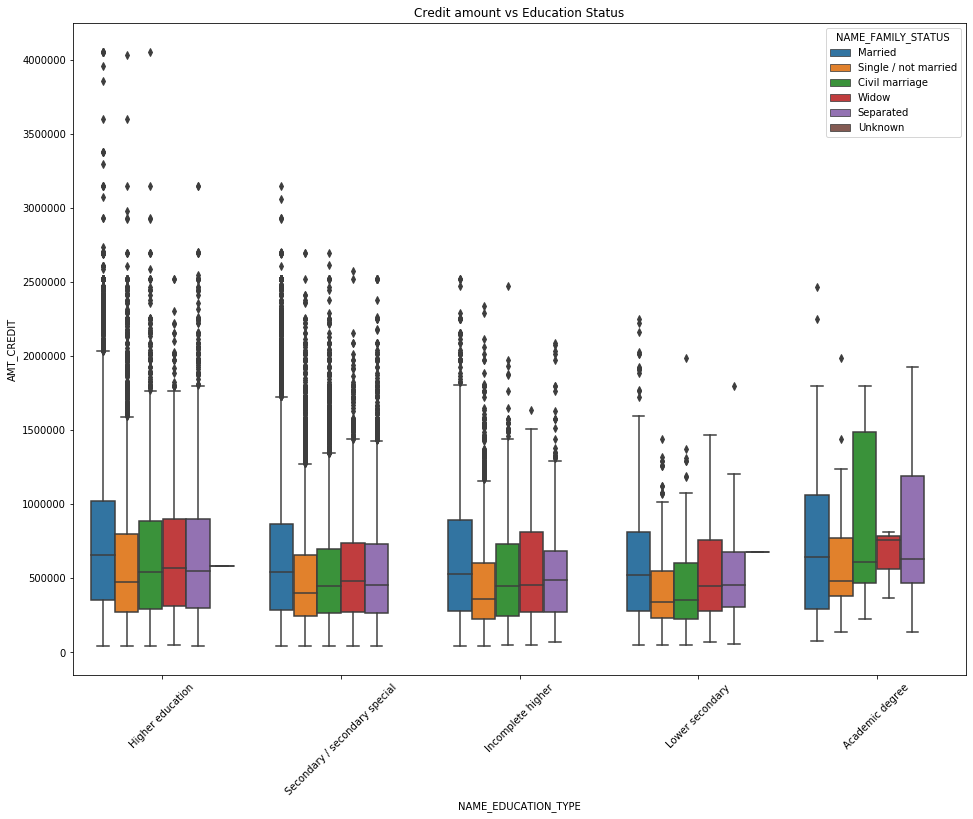

In [87]:
# Bivariate analysis for Target_0: Credit Amount vs Education Type

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data = df_Target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

From the above box plot we can conclude that 

1.Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.

2.higher education of family status of 'marriage', 'single','civil marriage',separated are having more outliers.

3.Civil marriage for Academic degree is having most of the credits in the third quartile.

#### Income amount vs Education Type

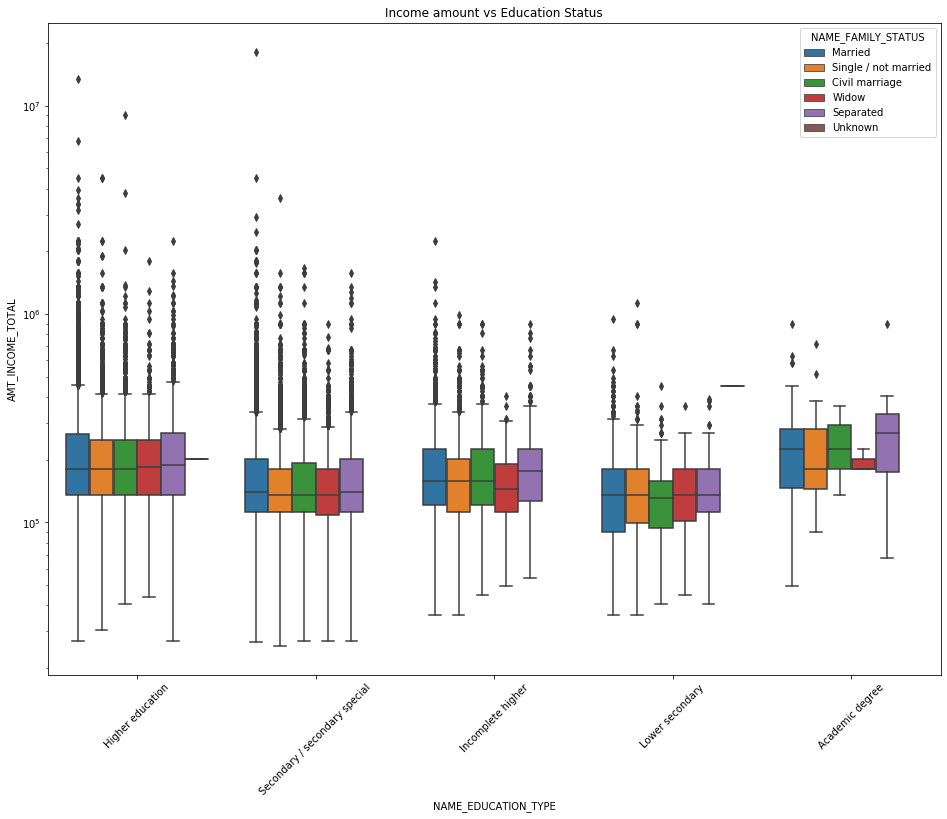

In [88]:
# Bivariate analysis for Target_0: Income amount vs Education Type

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data = df_Target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

From above boxplot we can conclude that:

1.for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers.

2.Less outlier are having for Academic degree but there income amount is little higher that Higher education.

3.Lower secondary of civil marriage family status are have less income amount than others.

#### Amount Goods Price vs Education Type

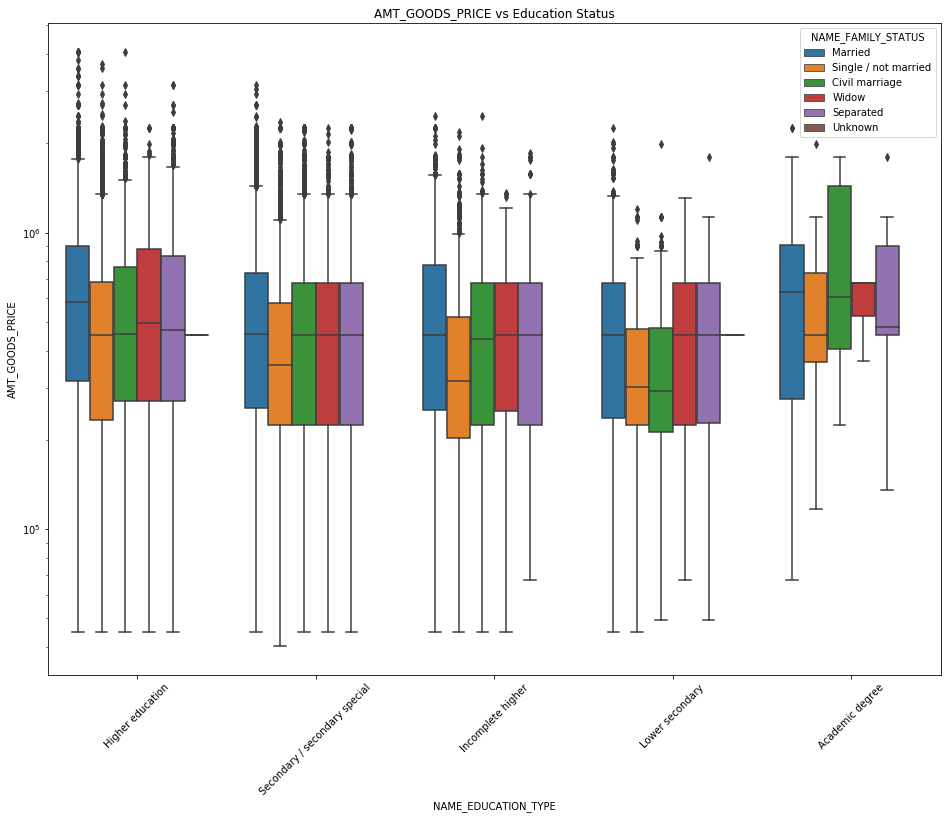

In [89]:
# Bivariate analysis for Target_0: AMT_GOODS_PRICE vs Education Type

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data = df_Target_0, x='NAME_EDUCATION_TYPE',y='AMT_GOODS_PRICE', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_GOODS_PRICE vs Education Status')
plt.show()

From the above box plot we can conclude that :

1. For Education type Higher education tend to have more outliers.

2. For education type Academic degree and family status of civil marriage tend to have opted for higher amount Good's price.

3. For education type Academic degree all family status seem to have less number of outliers.

## Bivariate Anlysis for Target 1

#### Credit Amount vs Education Type

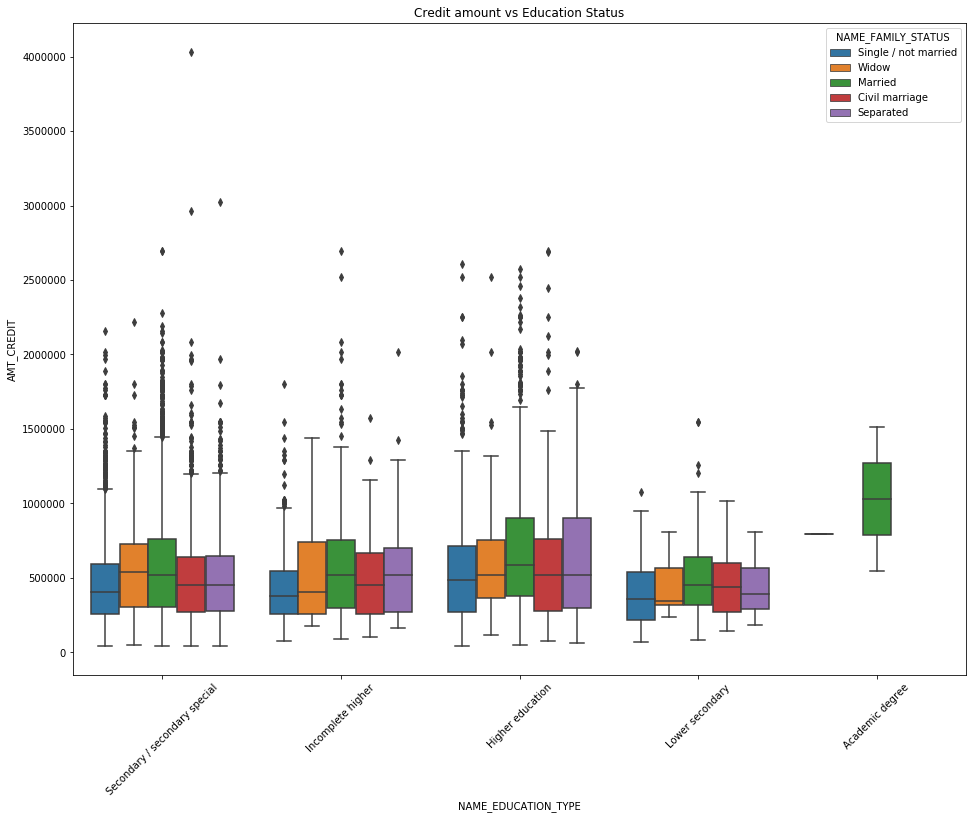

In [90]:
# Bivariate analysis for Target_1: Credit Amount vs Education Type

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data = df_Target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

For Target 1

1. From education type Academic degree the family status with single , widow, civil marraige, separated have not opted for Amount credit.

2.Most of the outliers are from Education type 'Higher education' and 'Secondary'.

3.married for Academic degree is having most of the credits compared to other education type and family status.

#### Income amount vs Education Type

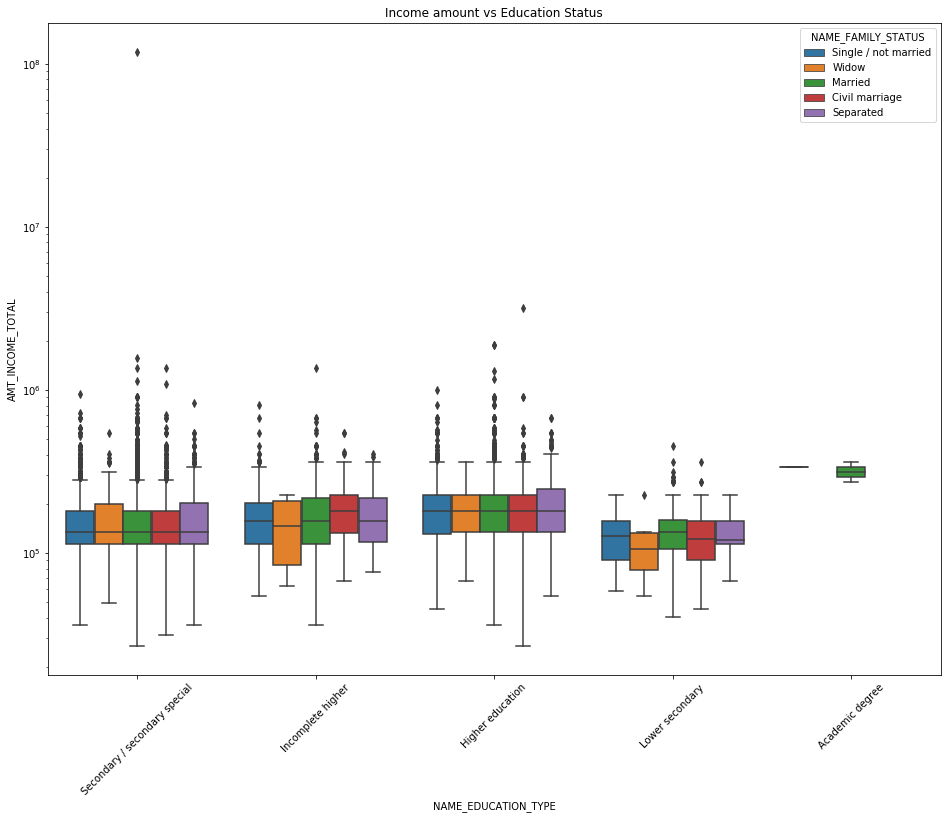

In [91]:
# Bivariate analysis for Target_1: Income amount vs Education Type

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data = df_Target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

1.From above boxplot for Education type 'Higher education' seem to have the income amount is mostly equal with family status. 

2.Less outlier are having for Academic degree but there income amount for family status 'married' is little higher that Higher education.

3.Lower secondary are have less income amount than others.

#### Amount Goods Price vs Education Type

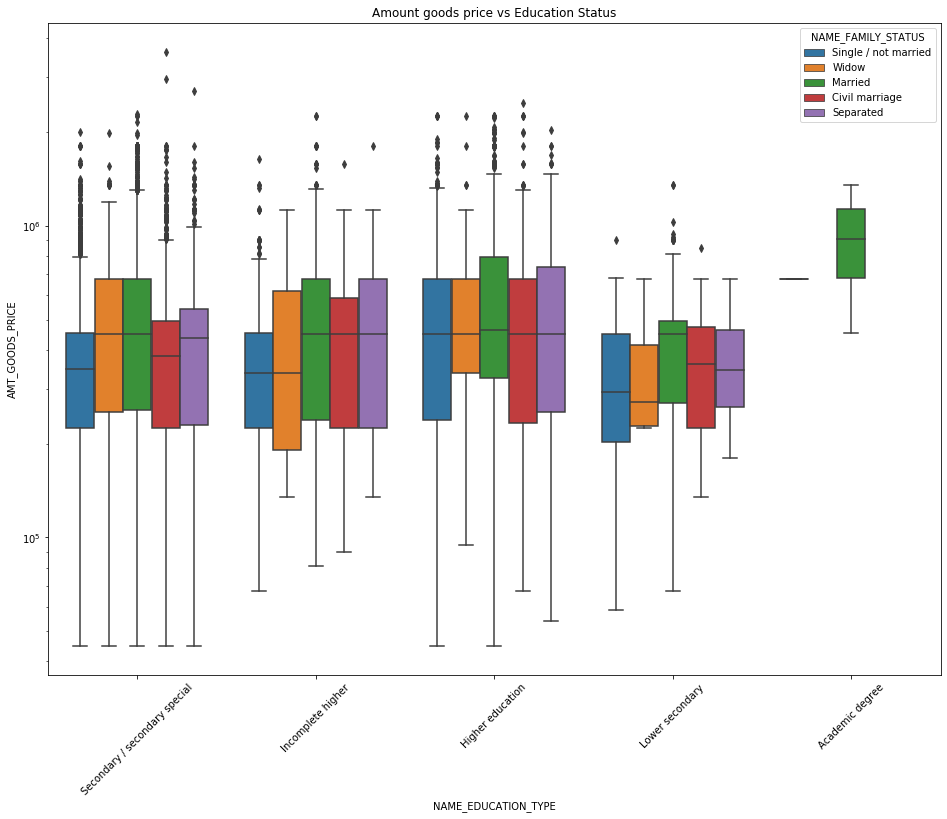

In [92]:
# Bivariate analysis for Target_1: AMT_GOODS_PRICE vs Education Type

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data = df_Target_1, x='NAME_EDUCATION_TYPE',y='AMT_GOODS_PRICE', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Amount goods price vs Education Status')
plt.show()

1.From above boxplot for Education type 'Higher education' and "secondary /secondary special seem to have more outlers than the rest." 

2.Less outlier are having for Academic degree but there income amount for family status 'married' is higher than rest of the education type and rest of the family status.

3.Lower secondary are have less income amount than others.

## Previous application data Analysis


#### Reading the Previous  Application dataset

In [93]:
# Reading the previous application of the customer
df_prev_application=pd.read_csv("previous_application.csv")

#### Shape of the Previous application datset

In [94]:
# Checking for no of rows and columns of previous customer
df_prev_application.shape

(1670214, 37)

In [95]:
# check for previous customer header
df_prev_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Check data types of prev_application dataset

In [96]:
 # Checking for column vise info for the previous customer data frame
df_prev_application.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [97]:
#Checking for statistical summary of previous customer columns
df_prev_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### Check for null value percentage in all the prev_application data set columns

In [98]:
#percentage of missing value for previous customer data frame
df_prev_application.isna().sum()/len(df_prev_application)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### Dropping columns having higher null percenatge values

In [99]:
# drop columns who have a null value percentage higher
df_prev_application.drop(df_prev_application.iloc[:, 31:37],inplace=True, axis=1)

In [100]:
#percentage of missing value for previous customer data frame
df_prev_application.isna().sum()/len(df_prev_application)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### Dropping unwanted columns from previous dataset

In [101]:
# drop 9 columns from application data frame manually
df_prev_application.drop(['AMT_ANNUITY','AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',"RATE_DOWN_PAYMENT","RATE_INTEREST_PRIMARY","RATE_INTEREST_PRIVILEGED","NAME_TYPE_SUITE","CNT_PAYMENT","PRODUCT_COMBINATION"],inplace=True, axis = 1)

In [102]:
# Removing the column values of 'XNA' and 'XAP'

#df_prev_application=df_prev_application.drop(df_prev_application[df_prev_application['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_prev_application=df_prev_application.drop(df_prev_application[df_prev_application['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_prev_application=df_prev_application.drop(df_prev_application[df_prev_application['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df_prev_application.shape

(69635, 22)

In [103]:
#percentage of missing value for previous customer data frame
df_prev_application.isna().sum()/len(df_prev_application)*100

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
NAME_YIELD_GROUP               0.0
dtype: float64

In [104]:
df_prev_application.shape

(69635, 22)

#### Merging application and Previous application dataset

In [105]:
# Now merging the Application dataset with previous appliaction dataset

df_combined_application=pd.merge(left=df_application,right=df_prev_application,how='inner',on='SK_ID_CURR',suffixes='_x')

#### Renaming columns with similar names

In [106]:
# Renaming the column names after merging

df_combined_application_updated = df_combined_application.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

#### Removing unwanted columns

In [107]:
# Removing unwanted columns for analysis

df_combined_application_updated.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

### Perform Univariate analysis on combined dataset

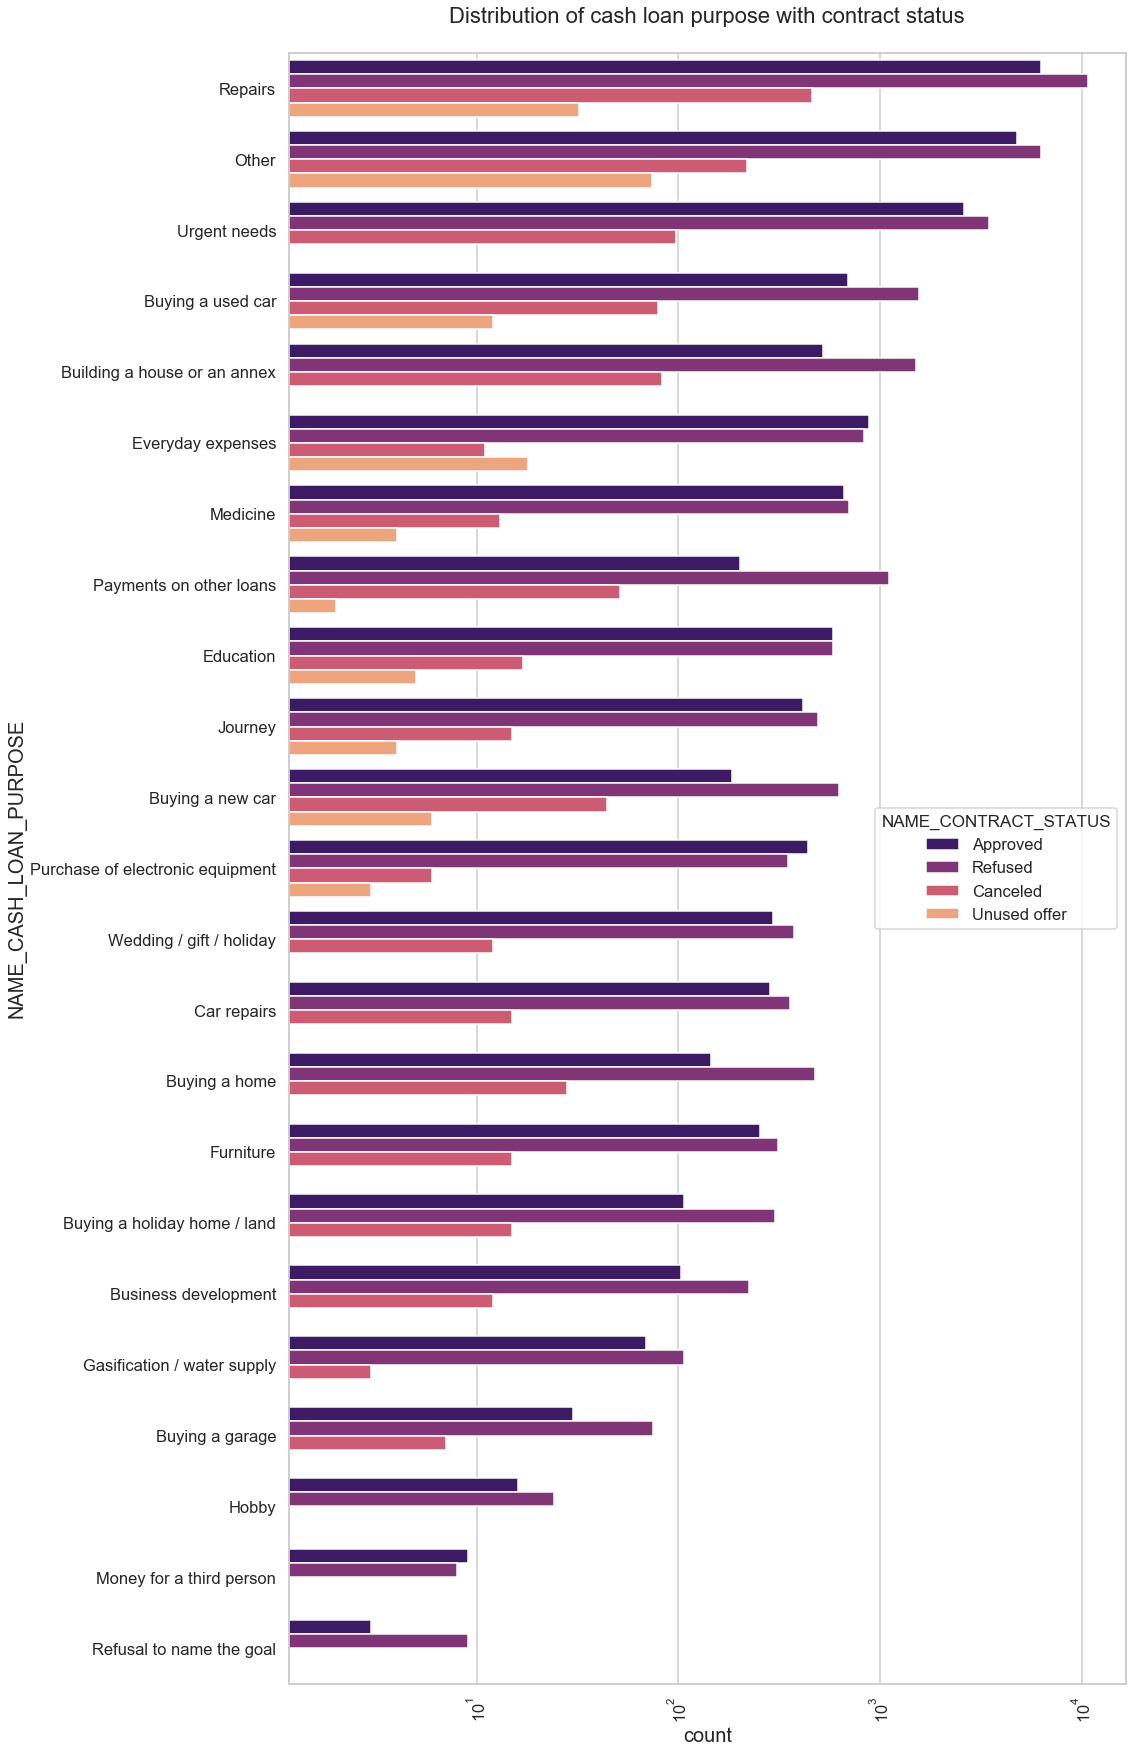

In [108]:
# Distribution of cash loan purpose with contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of cash loan purpose with contract status')
ax = sns.countplot(data = df_combined_application_updated, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_combined_application_updated['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

Points to be concluded from above plot:

1. Most refusals for the loans came from purpose 'repairs'.
2. For education purposes we have equal number of approves and refusal.
3. Paying other loans and buying a new car is having significant higher refusals than approvals.
4. Most of the cancellation  are for the loan purpose repairs'.

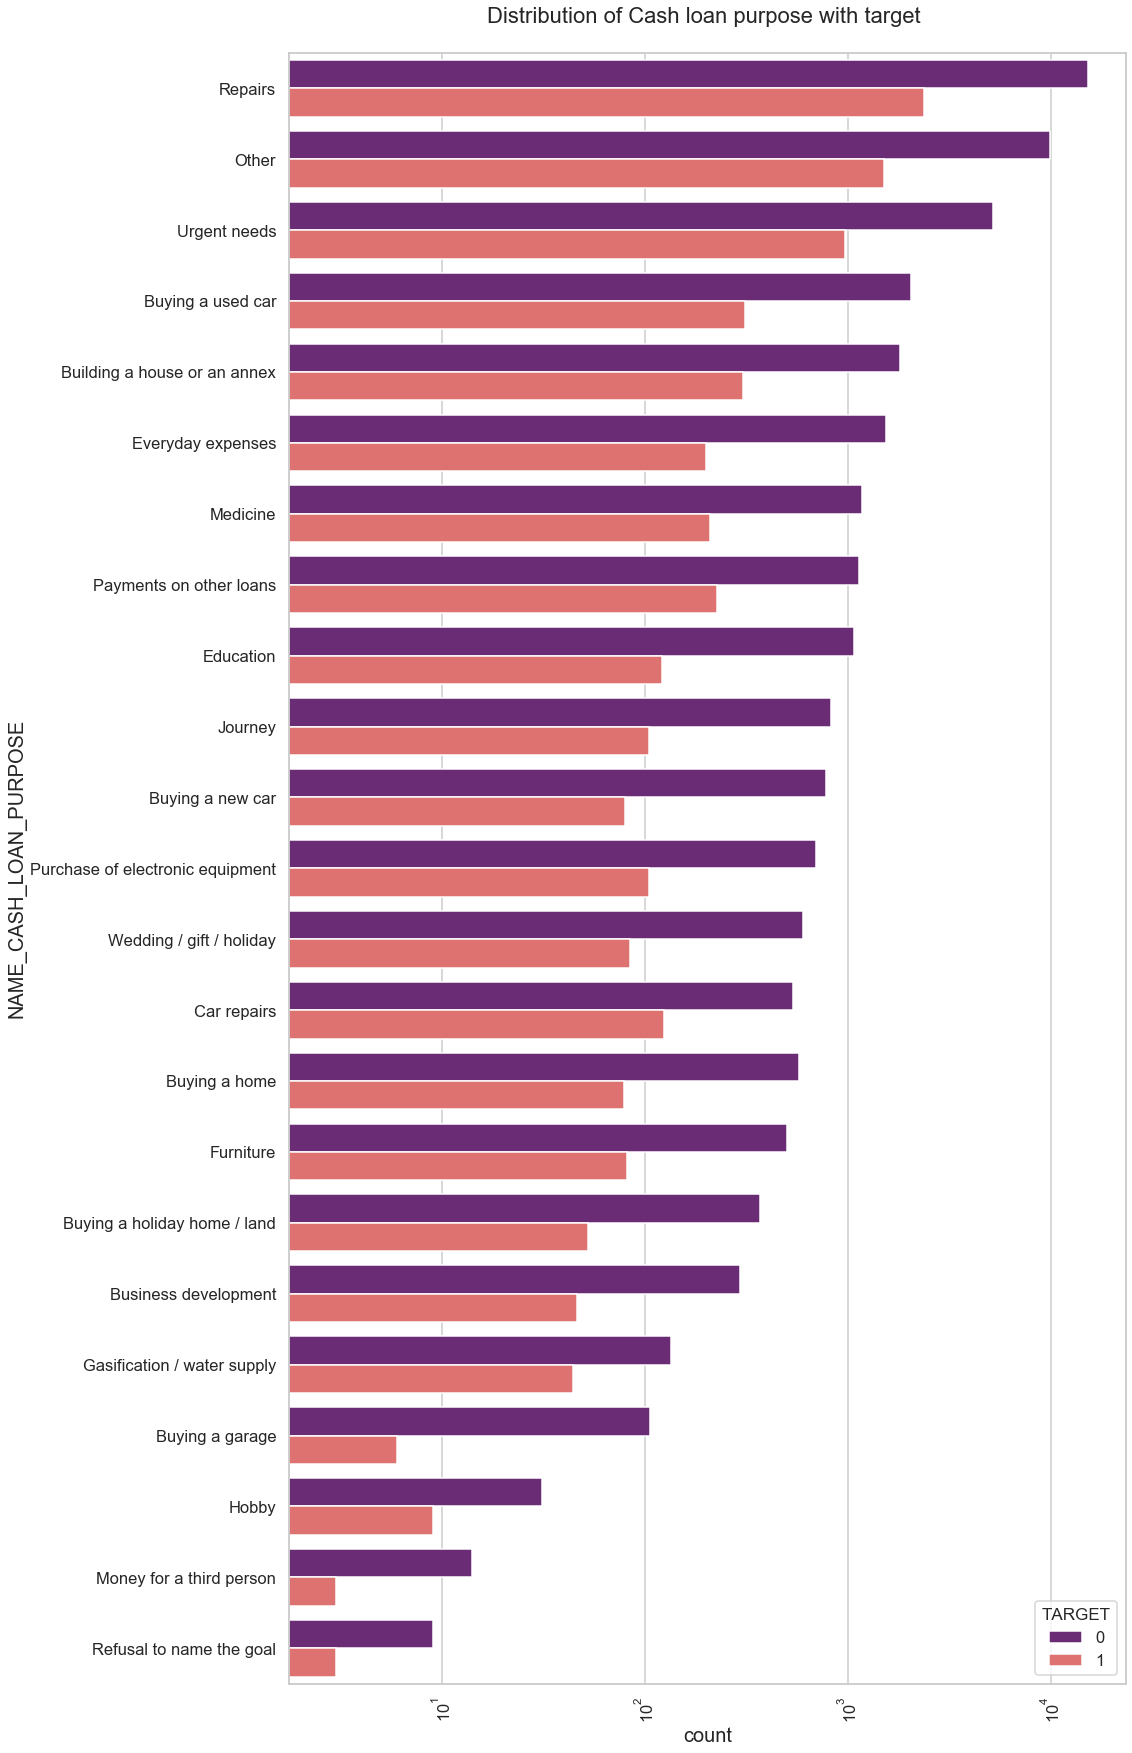

In [109]:
# Distribution of cash loan Purpose with Target status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Cash loan purpose with target ')
ax = sns.countplot(data = df_combined_application_updated, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_combined_application_updated['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')

Few points we can conclude from abpve plot:

1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
2. Following Loan purposes that are'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'where loan payment on time is significant higher than facing difficulties.Hence the Banks can focus on these purposes for which the client is having significant higher chances of repaying the loan amount on time.

### Perform Bivariate analysis on combined dataset

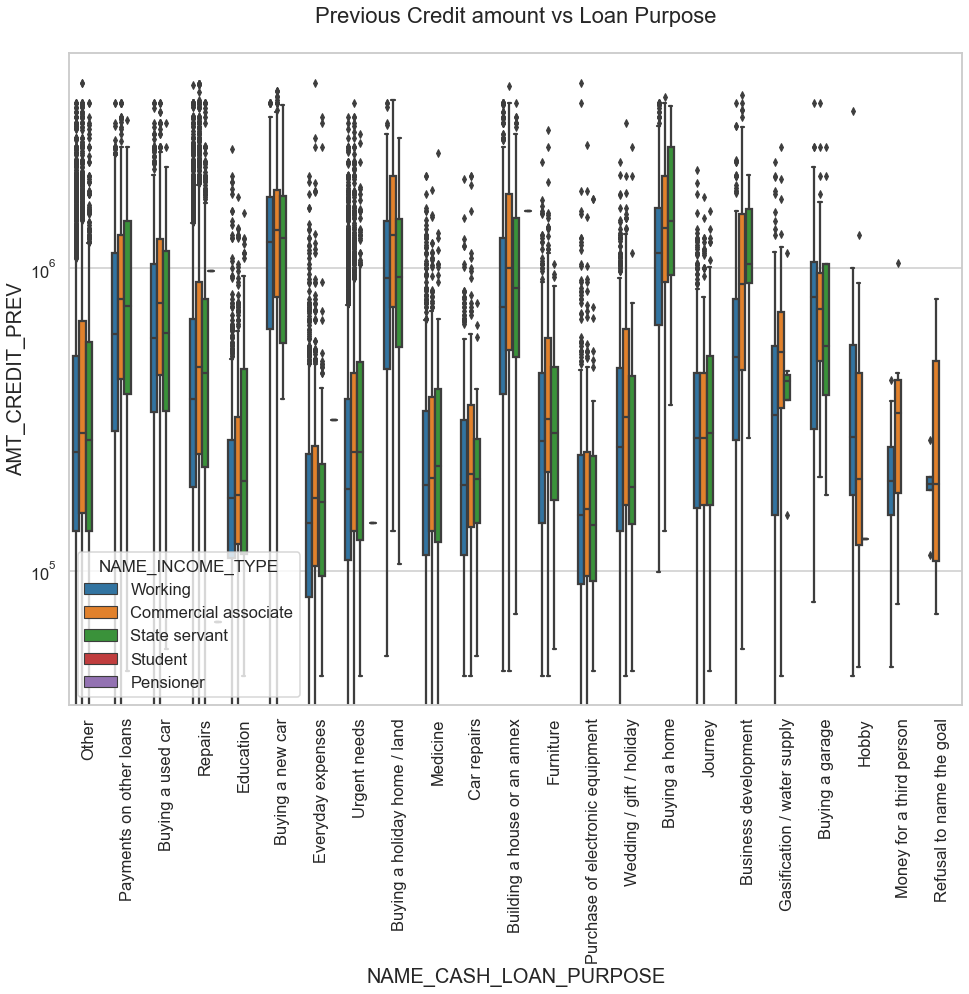

In [110]:
# Box plotting for previous Credit amount and cash loan purpose

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =df_combined_application_updated, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Previous Credit amount vs Loan Purpose')
plt.show()

From the above we can conclude some points-

1. The credit amount of Loan purposes like 'Buying a new car','Buying a land','Buying a home' and'Building a house' is higher.
2. Income type of state servants have a significant amount of credit applied
3. Money for third person or a Hobby is having less credits applied for.

### Categorical vs Numeric Bivariate Analysis 

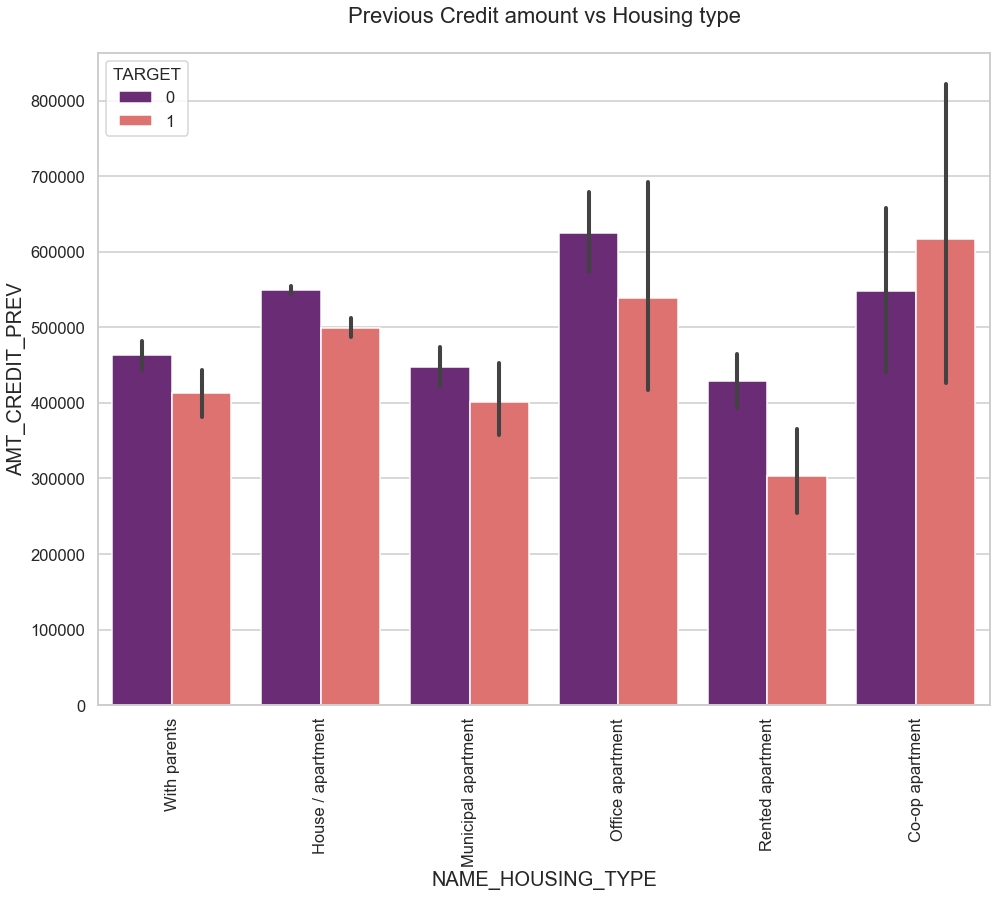

In [111]:
# Box plotting for Credit amount previous vs Housing type

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =df_combined_application_updated, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE',palette='magma')
plt.title('Previous Credit amount vs Housing type')
plt.show()

From the above plot we can conclude that.

1.Office appartment is having higher credit of target 0 

2.Co-op apartment is having higher credit of target 1.


From the above inferences we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.

Bank can focus mostly on housing type with parents ,House /appartment,municipal apartment or office apartment for successful payments.

## Findings from this Case Study

1. Banks should focus more on contract type ’pensioner’ ,‘Businessman’ and ‘Student’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

3. Also bank should avoid giving loans with purpose ‘Repair’  as it is having  a higher number of unsuccessful payments on time.

4. Get as much as clients from housing type ‘With Rented apartment’ as they are having least number of unsuccessful payments.


